In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zaber666/meld-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [2]:
import pandas as pd
import numpy as np
import re

# Load datasets
train_path = "/kaggle/input/MELD-RAW/MELD.Raw/train/train_sent_emo.csv"
test_path = "/kaggle/input/MELD-RAW/MELD.Raw/test_sent_emo.csv"
val_path = "/kaggle/input/MELD-RAW/MELD.Raw/dev_sent_emo.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(val_path)

def fix_encoding(text):
    if isinstance(text, str):
        # Fix common wrong apostrophes and quotes
        text = re.sub(r"[â€™]", "'", text)  
        text = re.sub(r"[â€˜]", "'", text)
        text = re.sub(r"[â€œ]", '"', text)
        text = re.sub(r"[â€]", '"', text)
        text = re.sub(r"[â€“â€”]", "-", text)
    return text

# Apply to your dataframe
train_df['Utterance'] = train_df['Utterance'].apply(fix_encoding)
val_df['Utterance'] = val_df['Utterance'].apply(fix_encoding)
test_df['Utterance'] = test_df['Utterance'].apply(fix_encoding)

# Basic Information
print("Dataset Shape:", train_df.shape)
print("\nColumn Names:", train_df.columns.tolist())
display(train_df.head())

# Missing Values
print("\nMissing Values:")
display(train_df.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
display(train_df.describe())


Dataset Shape: (9989, 11)

Column Names: ['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID', 'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime']


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company's tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must've had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let's talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"



Missing Values:


Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


Statistical Summary:


,Sr No.,Dialogue_ID,Utterance_ID,Season,Episode
count,9989.000000,9989.000000,9989.00000,9989.000000,9989.000000
mean,5262.373511,526.549304,6.14516,4.853739,12.697467
std,3032.169169,302.464741,4.96027,2.389599,7.220051
min,1.000000,0.000000,0.00000,1.000000,1.000000
25%,2641.000000,261.000000,2.00000,3.000000,6.000000
50%,5267.000000,531.000000,5.00000,5.000000,12.000000
75%,7891.000000,795.000000,9.00000,7.000000,19.000000
max,10478.000000,1038.000000,23.00000,9.000000,25.000000


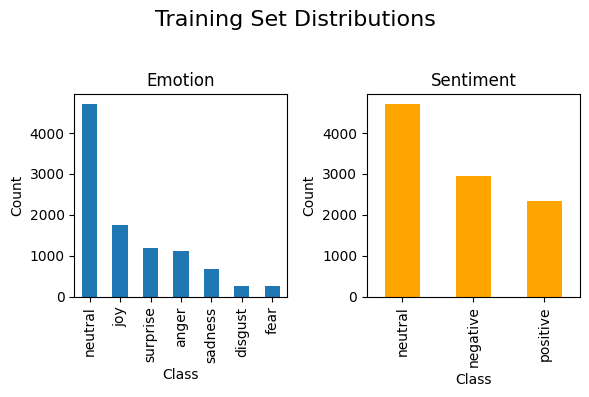


Emotion Class Counts:
Emotion
neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: count, dtype: int64

Sentiment Class Counts:
Sentiment
neutral     4710
negative    2945
positive    2334
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Overall figure title
fig.suptitle("Training Set Distributions", fontsize=16)

# Emotion distribution
train_df['Emotion'].value_counts().plot(
    kind='bar', 
    title="Emotion", 
    ax=axes[0]
)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Sentiment distribution
train_df['Sentiment'].value_counts().plot(
    kind='bar', 
    title="Sentiment", 
    color='orange', 
    ax=axes[1]
)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

# Show plots
plt.show()

# Print the counts
print("\nEmotion Class Counts:")
print(train_df['Emotion'].value_counts())

print("\nSentiment Class Counts:")
print(train_df['Sentiment'].value_counts())


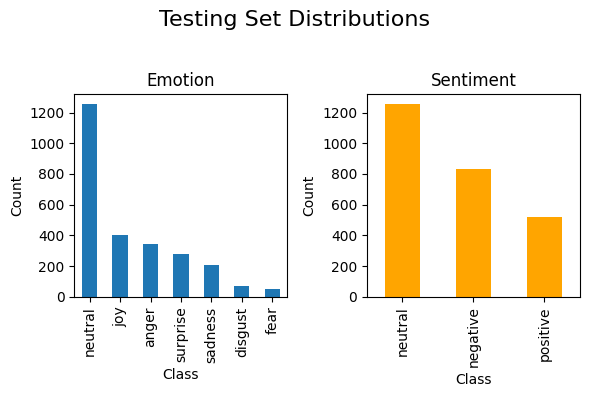


Emotion Class Counts:
Emotion
neutral     1256
joy          402
anger        345
surprise     281
sadness      208
disgust       68
fear          50
Name: count, dtype: int64

Sentiment Class Counts:
Sentiment
neutral     1256
negative     833
positive     521
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Overall figure title
fig.suptitle("Testing Set Distributions", fontsize=16)

# Emotion distribution
test_df['Emotion'].value_counts().plot(
    kind='bar', 
    title="Emotion", 
    ax=axes[0]
)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Sentiment distribution
test_df['Sentiment'].value_counts().plot(
    kind='bar', 
    title="Sentiment", 
    color='orange', 
    ax=axes[1]
)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

# Show plots
plt.show()

# Print the counts
print("\nEmotion Class Counts:")
print(test_df['Emotion'].value_counts())

print("\nSentiment Class Counts:")
print(test_df['Sentiment'].value_counts())


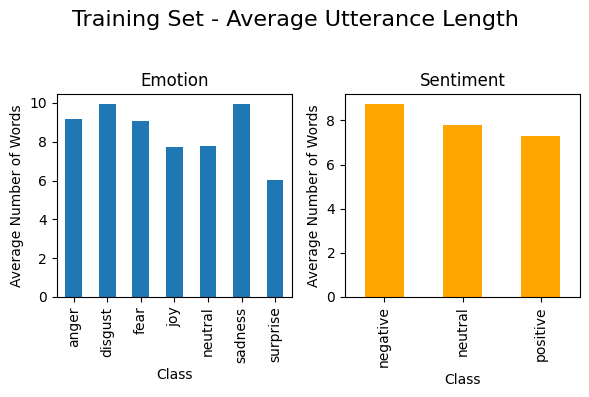

In [5]:
import matplotlib.pyplot as plt

# Calculate utterance length
train_df['utterance_length'] = train_df['Utterance'].apply(lambda x: len(x.split()))

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Overall title
fig.suptitle("Training Set - Average Utterance Length", fontsize=16)

# Average utterance length per Emotion
train_df.groupby('Emotion')['utterance_length'].mean().plot(
    kind='bar', 
    ax=axes[0],
    title='Emotion'
)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Average Number of Words')

# Average utterance length per Sentiment
train_df.groupby('Sentiment')['utterance_length'].mean().plot(
    kind='bar', 
    ax=axes[1],
    title='Sentiment',
    color='orange'
)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Average Number of Words')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plots
plt.show()


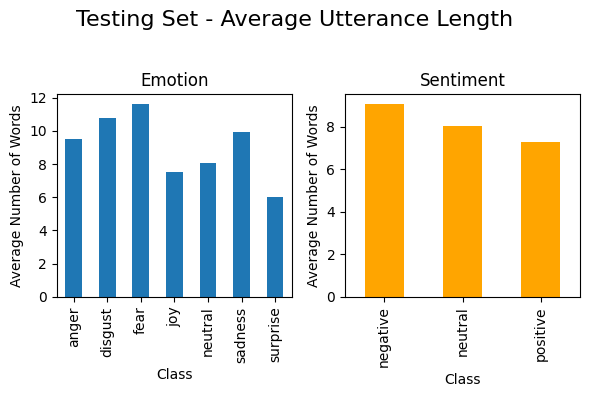

In [6]:
import matplotlib.pyplot as plt

# Calculate utterance length
test_df['utterance_length'] = test_df['Utterance'].apply(lambda x: len(x.split()))

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Overall title
fig.suptitle("Testing Set - Average Utterance Length", fontsize=16)

# Average utterance length per Emotion
test_df.groupby('Emotion')['utterance_length'].mean().plot(
    kind='bar', 
    ax=axes[0],
    title='Emotion'
)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Average Number of Words')

# Average utterance length per Sentiment
test_df.groupby('Sentiment')['utterance_length'].mean().plot(
    kind='bar', 
    ax=axes[1],
    title='Sentiment',
    color='orange'
)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Average Number of Words')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plots
plt.show()


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (train): Failed to open dia125_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a638c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found


Warning (test): Failed to open ._dia29_utt3.mp4
Warning (test): Failed to open ._dia255_utt6.mp4
Warning (test): Failed to open ._dia78_utt4.mp4
Warning (test): Failed to open ._dia113_utt1.mp4
Warning (test): Failed to open ._dia33_utt6.mp4
Warning (test): Failed to open ._dia5_utt0.mp4
Warning (test): Failed to open ._dia270_utt12.mp4
Warning (test): Failed to open ._dia192_utt0.mp4
Warning (test): Failed to open ._dia37_utt7.mp4
Warning (test): Failed to open ._dia102_utt5.mp4
Warning (test): Failed to open ._dia7_utt8.mp4
Warning (test): Failed to open ._dia213_utt1.mp4
Warning (test): Failed to open ._dia115_utt3.mp4
Warning (test): Failed to open ._dia181_utt0.mp4
Warning (test): Failed to open ._dia127_utt2.mp4
Warning (test): Failed to open ._dia12_utt10.mp4
Warning (test): Failed to open ._dia157_utt1.mp4
Warning (test): Failed to open ._dia77_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d7c280] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found


Warning (test): Failed to open ._dia178_utt5.mp4
Warning (test): Failed to open ._dia145_utt1.mp4
Warning (test): Failed to open ._dia215_utt9.mp4
Warning (test): Failed to open ._dia211_utt4.mp4
Warning (test): Failed to open ._dia271_utt5.mp4
Warning (test): Failed to open ._dia125_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found


Warning (test): Failed to open ._dia54_utt3.mp4
Warning (test): Failed to open ._dia32_utt12.mp4
Warning (test): Failed to open ._dia3_utt3.mp4
Warning (test): Failed to open ._dia4_utt4.mp4
Warning (test): Failed to open ._dia102_utt3.mp4
Warning (test): Failed to open ._dia71_utt9.mp4
Warning (test): Failed to open ._dia78_utt7.mp4
Warning (test): Failed to open ._dia73_utt10.mp4
Warning (test): Failed to open ._dia17_utt9.mp4
Warning (test): Failed to open ._dia210_utt9.mp4
Warning (test): Failed to open ._dia39_utt3.mp4
Warning (test): Failed to open ._dia68_utt4.mp4
Warning (test): Failed to open ._dia45_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d7c280] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not fou

Warning (test): Failed to open ._dia28_utt10.mp4
Warning (test): Failed to open ._dia195_utt6.mp4
Warning (test): Failed to open ._dia175_utt4.mp4
Warning (test): Failed to open ._dia112_utt20.mp4
Warning (test): Failed to open ._dia110_utt0.mp4
Warning (test): Failed to open ._dia63_utt0.mp4
Warning (test): Failed to open ._dia264_utt2.mp4
Warning (test): Failed to open ._dia28_utt8.mp4
Warning (test): Failed to open ._dia97_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40400] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40400] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia41_utt7.mp4
Warning (test): Failed to open ._dia215_utt2.mp4
Warning (test): Failed to open ._dia231_utt10.mp4
Warning (test): Failed to open ._dia186_utt3.mp4
Warning (test): Failed to open ._dia59_utt1.mp4
Warning (test): Failed to open ._dia24_utt0.mp4
Warning (test): Failed to open ._dia244_utt15.mp4
Warning (test): Failed to open ._dia45_utt2.mp4
Warning (test): Failed to open ._dia213_utt4.mp4
Warning (test): Failed to open ._dia167_utt7.mp4
Warning (test): Failed to open ._dia201_utt4.mp4
Warning (test): Failed to open ._dia58_utt2.mp4
Warning (test): Failed to open ._dia57_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67940] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found


Warning (test): Failed to open ._dia164_utt0.mp4
Warning (test): Failed to open ._dia276_utt0.mp4
Warning (test): Failed to open ._dia52_utt7.mp4
Warning (test): Failed to open ._dia201_utt10.mp4
Warning (test): Failed to open ._dia17_utt32.mp4
Warning (test): Failed to open ._dia3_utt0.mp4
Warning (test): Failed to open ._dia167_utt1.mp4
Warning (test): Failed to open ._dia1_utt0.mp4
Warning (test): Failed to open ._dia99_utt8.mp4
Warning (test): Failed to open ._dia143_utt5.mp4
Warning (test): Failed to open ._dia122_utt4.mp4
Warning (test): Failed to open ._dia237_utt5.mp4
Warning (test): Failed to open ._dia56_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d73300] moov atom not found


Warning (test): Failed to open ._dia12_utt17.mp4
Warning (test): Failed to open ._dia111_utt12.mp4
Warning (test): Failed to open ._dia120_utt2.mp4
Warning (test): Failed to open ._dia237_utt2.mp4
Warning (test): Failed to open ._dia107_utt9.mp4
Warning (test): Failed to open ._dia74_utt3.mp4
Warning (test): Failed to open ._dia72_utt2.mp4
Warning (test): Failed to open ._dia171_utt8.mp4
Warning (test): Failed to open ._dia191_utt7.mp4
Warning (test): Failed to open ._dia85_utt5.mp4
Warning (test): Failed to open ._dia67_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found


Warning (test): Failed to open ._dia216_utt3.mp4
Warning (test): Failed to open ._dia49_utt6.mp4
Warning (test): Failed to open ._dia17_utt29.mp4
Warning (test): Failed to open ._dia120_utt3.mp4
Warning (test): Failed to open ._dia161_utt11.mp4
Warning (test): Failed to open ._dia268_utt2.mp4
Warning (test): Failed to open ._dia155_utt5.mp4
Warning (test): Failed to open ._dia183_utt8.mp4
Warning (test): Failed to open ._dia114_utt4.mp4
Warning (test): Failed to open ._dia273_utt3.mp4
Warning (test): Failed to open ._dia262_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia113_utt8.mp4
Warning (test): Failed to open ._dia169_utt1.mp4
Warning (test): Failed to open ._dia198_utt2.mp4
Warning (test): Failed to open ._dia72_utt6.mp4
Warning (test): Failed to open ._dia222_utt11.mp4
Warning (test): Failed to open ._dia13_utt1.mp4
Warning (test): Failed to open ._dia28_utt12.mp4
Warning (test): Failed to open ._dia25_utt7.mp4
Warning (test): Failed to open ._dia70_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afefc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia111_utt2.mp4
Warning (test): Failed to open ._dia12_utt13.mp4
Warning (test): Failed to open ._dia12_utt1.mp4
Warning (test): Failed to open ._dia252_utt17.mp4
Warning (test): Failed to open ._dia117_utt8.mp4
Warning (test): Failed to open ._dia218_utt0.mp4
Warning (test): Failed to open ._dia263_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found


Warning (test): Failed to open ._dia174_utt2.mp4
Warning (test): Failed to open ._dia93_utt11.mp4
Warning (test): Failed to open ._dia73_utt6.mp4
Warning (test): Failed to open ._dia54_utt0.mp4
Warning (test): Failed to open ._dia227_utt1.mp4
Warning (test): Failed to open ._dia14_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afc680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afc680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afc680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a346c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia182_utt1.mp4
Warning (test): Failed to open ._dia108_utt8.mp4
Warning (test): Failed to open ._dia263_utt0.mp4
Warning (test): Failed to open ._dia97_utt1.mp4
Warning (test): Failed to open ._dia2_utt0.mp4
Warning (test): Failed to open ._dia205_utt7.mp4
Warning (test): Failed to open ._dia170_utt0.mp4
Warning (test): Failed to open ._dia258_utt2.mp4
Warning (test): Failed to open ._dia110_utt8.mp4
Warning (test): Failed to open ._dia64_utt2.mp4
Warning (test): Failed to open ._dia201_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found


Warning (test): Failed to open ._dia37_utt1.mp4
Warning (test): Failed to open ._dia211_utt5.mp4
Warning (test): Failed to open ._dia22_utt13.mp4
Warning (test): Failed to open ._dia241_utt8.mp4
Warning (test): Failed to open ._dia163_utt6.mp4
Warning (test): Failed to open ._dia70_utt16.mp4
Warning (test): Failed to open ._dia239_utt4.mp4
Warning (test): Failed to open ._dia61_utt0.mp4
Warning (test): Failed to open ._dia55_utt0.mp4
Warning (test): Failed to open ._dia261_utt3.mp4
Warning (test): Failed to open ._dia140_utt14.mp4
Warning (test): Failed to open ._dia255_utt7.mp4
Warning (test): Failed to open ._dia73_utt7.mp4
Warning (test): Failed to open ._dia245_utt3.mp4
Warning (test): Failed to open ._dia268_utt7.mp4
Warning (test): Failed to open ._dia166_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31964440] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63bc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia181_utt5.mp4
Warning (test): Failed to open ._dia263_utt7.mp4
Warning (test): Failed to open ._dia103_utt5.mp4
Warning (test): Failed to open ._dia71_utt0.mp4
Warning (test): Failed to open ._dia70_utt9.mp4
Warning (test): Failed to open ._dia30_utt4.mp4
Warning (test): Failed to open ._dia235_utt0.mp4
Warning (test): Failed to open ._dia95_utt11.mp4
Warning (test): Failed to open ._dia250_utt0.mp4
Warning (test): Failed to open ._dia3_utt1.mp4
Warning (test): Failed to open ._dia49_utt7.mp4
Warning (test): Failed to open ._dia22_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c000] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia12_utt7.mp4
Warning (test): Failed to open ._dia201_utt8.mp4
Warning (test): Failed to open ._dia153_utt10.mp4
Warning (test): Failed to open ._dia270_utt14.mp4
Warning (test): Failed to open ._dia156_utt7.mp4
Warning (test): Failed to open ._dia139_utt6.mp4
Warning (test): Failed to open ._dia126_utt13.mp4
Warning (test): Failed to open ._dia206_utt2.mp4
Warning (test): Failed to open ._dia126_utt3.mp4
Warning (test): Failed to open ._dia274_utt1.mp4
Warning (test): Failed to open ._dia47_utt5.mp4
Warning (test): Failed to open ._dia231_utt13.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia76_utt1.mp4
Warning (test): Failed to open ._dia145_utt4.mp4
Warning (test): Failed to open ._dia246_utt12.mp4
Warning (test): Failed to open ._dia234_utt14.mp4
Warning (test): Failed to open ._dia124_utt13.mp4
Warning (test): Failed to open ._dia78_utt6.mp4
Warning (test): Failed to open ._dia22_utt19.mp4
Warning (test): Failed to open ._dia214_utt1.mp4
Warning (test): Failed to open ._dia175_utt16.mp4
Warning (test): Failed to open ._dia94_utt0.mp4
Warning (test): Failed to open ._dia141_utt1.mp4
Warning (test): Failed to open ._dia84_utt1.mp4
Warning (test): Failed to open ._dia189_utt3.mp4
Warning (test): Failed to open ._dia168_utt17.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia39_utt5.mp4
Warning (test): Failed to open ._dia60_utt4.mp4
Warning (test): Failed to open ._dia212_utt5.mp4
Warning (test): Failed to open ._dia21_utt3.mp4
Warning (test): Failed to open ._dia128_utt9.mp4
Warning (test): Failed to open ._dia170_utt4.mp4
Warning (test): Failed to open ._dia194_utt3.mp4
Warning (test): Failed to open ._dia107_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia38_utt3.mp4
Warning (test): Failed to open ._dia192_utt11.mp4
Warning (test): Failed to open ._dia39_utt2.mp4
Warning (test): Failed to open ._dia66_utt1.mp4
Warning (test): Failed to open ._dia173_utt18.mp4
Warning (test): Failed to open ._dia184_utt9.mp4
Warning (test): Failed to open ._dia92_utt2.mp4
Warning (test): Failed to open ._dia201_utt11.mp4
Warning (test): Failed to open ._dia73_utt2.mp4
Warning (test): Failed to open ._dia111_utt8.mp4
Warning (test): Failed to open ._dia209_utt1.mp4
Warning (test): Failed to open ._dia267_utt10.mp4
Warning (test): Failed to open ._dia68_utt11.mp4
Warning (test): Failed to open ._dia154_utt3.mp4
Warning (test): Failed to open ._dia225_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia154_utt15.mp4
Warning (test): Failed to open ._dia16_utt3.mp4
Warning (test): Failed to open ._dia7_utt7.mp4
Warning (test): Failed to open ._dia157_utt3.mp4
Warning (test): Failed to open ._dia253_utt6.mp4
Warning (test): Failed to open ._dia124_utt1.mp4
Warning (test): Failed to open ._dia206_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia237_utt1.mp4
Warning (test): Failed to open ._dia85_utt0.mp4
Warning (test): Failed to open ._dia17_utt31.mp4
Warning (test): Failed to open ._dia176_utt1.mp4
Warning (test): Failed to open ._dia128_utt5.mp4
Warning (test): Failed to open ._dia143_utt1.mp4
Warning (test): Failed to open ._dia47_utt6.mp4
Warning (test): Failed to open ._dia107_utt2.mp4
Warning (test): Failed to open ._dia156_utt9.mp4
Warning (test): Failed to open ._dia98_utt10.mp4
Warning (test): Failed to open ._dia130_utt12.mp4
Warning (test): Failed to open ._dia31_utt0.mp4
Warning (test): Failed to open ._dia167_utt3.mp4
Warning (test): Failed to open ._dia89_utt2.mp4
Warning (test): Failed to open ._dia211_utt3.mp4
Warning (test): Failed to open ._dia229_utt3.mp4
Warning (test): Failed to open ._dia253_utt2.mp4
Warning (test): Failed to open ._dia50_utt3.mp4
Warning (test): Failed to open ._dia22_utt2.mp4
Warning (test): Failed to open ._dia49_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not fou

Warning (test): Failed to open ._dia9_utt16.mp4
Warning (test): Failed to open ._dia2_utt8.mp4
Warning (test): Failed to open ._dia186_utt2.mp4
Warning (test): Failed to open ._dia53_utt2.mp4
Warning (test): Failed to open ._dia258_utt1.mp4
Warning (test): Failed to open ._dia171_utt7.mp4
Warning (test): Failed to open ._dia13_utt4.mp4
Warning (test): Failed to open ._dia96_utt8.mp4
Warning (test): Failed to open ._dia234_utt12.mp4
Warning (test): Failed to open ._dia23_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia18_utt2.mp4
Warning (test): Failed to open ._dia125_utt3.mp4
Warning (test): Failed to open ._dia156_utt6.mp4
Warning (test): Failed to open ._dia156_utt10.mp4
Warning (test): Failed to open ._dia234_utt8.mp4
Warning (test): Failed to open ._dia70_utt1.mp4
Warning (test): Failed to open ._dia51_utt0.mp4
Warning (test): Failed to open ._dia167_utt9.mp4
Warning (test): Failed to open ._dia103_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found


Warning (test): Failed to open ._dia56_utt7.mp4
Warning (test): Failed to open ._dia52_utt8.mp4
Warning (test): Failed to open ._dia100_utt14.mp4
Warning (test): Failed to open ._dia8_utt4.mp4
Warning (test): Failed to open ._dia42_utt2.mp4
Warning (test): Failed to open ._dia148_utt0.mp4
Warning (test): Failed to open ._dia97_utt2.mp4
Warning (test): Failed to open ._dia85_utt4.mp4
Warning (test): Failed to open ._dia224_utt5.mp4
Warning (test): Failed to open ._dia195_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not found


Warning (test): Failed to open ._dia13_utt0.mp4
Warning (test): Failed to open ._dia111_utt3.mp4
Warning (test): Failed to open ._dia8_utt5.mp4
Warning (test): Failed to open ._dia118_utt5.mp4
Warning (test): Failed to open ._dia149_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3a840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia118_utt4.mp4
Warning (test): Failed to open ._dia130_utt16.mp4
Warning (test): Failed to open ._dia133_utt3.mp4
Warning (test): Failed to open ._dia271_utt2.mp4
Warning (test): Failed to open ._dia22_utt7.mp4
Warning (test): Failed to open ._dia75_utt2.mp4
Warning (test): Failed to open ._dia213_utt5.mp4
Warning (test): Failed to open ._dia184_utt14.mp4
Warning (test): Failed to open ._dia208_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x319659c0] moov atom not found


Warning (test): Failed to open ._dia109_utt0.mp4
Warning (test): Failed to open ._dia178_utt0.mp4
Warning (test): Failed to open ._dia165_utt2.mp4
Warning (test): Failed to open ._dia133_utt2.mp4
Warning (test): Failed to open ._dia188_utt4.mp4
Warning (test): Failed to open ._dia119_utt0.mp4
Warning (test): Failed to open ._dia21_utt1.mp4
Warning (test): Failed to open ._dia137_utt14.mp4
Warning (test): Failed to open ._dia61_utt2.mp4
Warning (test): Failed to open ._dia60_utt1.mp4
Warning (test): Failed to open ._dia34_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x319659c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b1c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965440] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965440] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965440] moov atom not found


Warning (test): Failed to open ._dia116_utt2.mp4
Warning (test): Failed to open ._dia215_utt1.mp4
Warning (test): Failed to open ._dia243_utt0.mp4
Warning (test): Failed to open ._dia47_utt1.mp4
Warning (test): Failed to open ._dia229_utt2.mp4
Warning (test): Failed to open ._dia81_utt0.mp4
Warning (test): Failed to open ._dia123_utt9.mp4
Warning (test): Failed to open ._dia183_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b357c0] moov atom not found


Warning (test): Failed to open ._dia158_utt5.mp4
Warning (test): Failed to open ._dia22_utt10.mp4
Warning (test): Failed to open ._dia205_utt2.mp4
Warning (test): Failed to open ._dia93_utt6.mp4
Warning (test): Failed to open ._dia171_utt6.mp4
Warning (test): Failed to open ._dia54_utt10.mp4
Warning (test): Failed to open ._dia215_utt6.mp4
Warning (test): Failed to open ._dia73_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found


Warning (test): Failed to open ._dia21_utt2.mp4
Warning (test): Failed to open ._dia34_utt8.mp4
Warning (test): Failed to open ._dia127_utt5.mp4
Warning (test): Failed to open ._dia278_utt7.mp4
Warning (test): Failed to open ._dia268_utt1.mp4
Warning (test): Failed to open ._dia272_utt3.mp4
Warning (test): Failed to open ._dia232_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found


Warning (test): Failed to open ._dia222_utt9.mp4
Warning (test): Failed to open ._dia15_utt5.mp4
Warning (test): Failed to open ._dia72_utt15.mp4
Warning (test): Failed to open ._dia12_utt16.mp4
Warning (test): Failed to open ._dia228_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63bc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63bc0] moov atom not found


Warning (test): Failed to open ._dia266_utt12.mp4
Warning (test): Failed to open ._dia37_utt6.mp4
Warning (test): Failed to open ._dia199_utt1.mp4
Warning (test): Failed to open ._dia269_utt4.mp4
Warning (test): Failed to open ._dia168_utt9.mp4
Warning (test): Failed to open ._dia195_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965d80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia198_utt3.mp4
Warning (test): Failed to open ._dia184_utt6.mp4
Warning (test): Failed to open ._dia12_utt9.mp4
Warning (test): Failed to open ._dia126_utt1.mp4
Warning (test): Failed to open ._dia144_utt4.mp4
Warning (test): Failed to open ._dia107_utt10.mp4
Warning (test): Failed to open ._dia139_utt8.mp4
Warning (test): Failed to open ._dia274_utt0.mp4
Warning (test): Failed to open ._dia137_utt7.mp4
Warning (test): Failed to open ._dia253_utt7.mp4
Warning (test): Failed to open ._dia112_utt8.mp4
Warning (test): Failed to open ._dia32_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found


Warning (test): Failed to open ._dia143_utt3.mp4
Warning (test): Failed to open ._dia13_utt6.mp4
Warning (test): Failed to open ._dia227_utt2.mp4
Warning (test): Failed to open ._dia160_utt2.mp4
Warning (test): Failed to open ._dia239_utt8.mp4
Warning (test): Failed to open ._dia28_utt11.mp4
Warning (test): Failed to open ._dia15_utt3.mp4
Warning (test): Failed to open ._dia266_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c040] moov atom not found


Warning (test): Failed to open ._dia35_utt3.mp4
Warning (test): Failed to open ._dia134_utt0.mp4
Warning (test): Failed to open ._dia124_utt0.mp4
Warning (test): Failed to open ._dia226_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a343c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c000] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia17_utt18.mp4
Warning (test): Failed to open ._dia95_utt14.mp4
Warning (test): Failed to open ._dia161_utt2.mp4
Warning (test): Failed to open ._dia12_utt2.mp4
Warning (test): Failed to open ._dia71_utt12.mp4
Warning (test): Failed to open ._dia263_utt1.mp4
Warning (test): Failed to open ._dia9_utt5.mp4
Warning (test): Failed to open ._dia42_utt7.mp4
Warning (test): Failed to open ._dia259_utt13.mp4
Warning (test): Failed to open ._dia54_utt2.mp4
Warning (test): Failed to open ._dia217_utt2.mp4
Warning (test): Failed to open ._dia80_utt2.mp4
Warning (test): Failed to open ._dia142_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found


Warning (test): Failed to open ._dia49_utt14.mp4
Warning (test): Failed to open ._dia174_utt17.mp4
Warning (test): Failed to open ._dia144_utt6.mp4
Warning (test): Failed to open ._dia22_utt11.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d917c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67780] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found


Warning (test): Failed to open ._dia246_utt3.mp4
Warning (test): Failed to open ._dia112_utt13.mp4
Warning (test): Failed to open ._dia49_utt5.mp4
Warning (test): Failed to open ._dia237_utt4.mp4
Warning (test): Failed to open ._dia168_utt1.mp4
Warning (test): Failed to open ._dia42_utt3.mp4
Warning (test): Failed to open ._dia189_utt6.mp4
Warning (test): Failed to open ._dia108_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found


Warning (test): Failed to open ._dia52_utt2.mp4
Warning (test): Failed to open ._dia145_utt8.mp4
Warning (test): Failed to open ._dia25_utt10.mp4
Warning (test): Failed to open ._dia120_utt16.mp4
Warning (test): Failed to open ._dia157_utt2.mp4
Warning (test): Failed to open ._dia199_utt9.mp4
Warning (test): Failed to open ._dia168_utt12.mp4
Warning (test): Failed to open ._dia269_utt1.mp4
Warning (test): Failed to open ._dia19_utt0.mp4
Warning (test): Failed to open ._dia244_utt5.mp4
Warning (test): Failed to open ._dia217_utt10.mp4
Warning (test): Failed to open ._dia183_utt1.mp4
Warning (test): Failed to open ._dia57_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found


Warning (test): Failed to open ._dia117_utt3.mp4
Warning (test): Failed to open ._dia228_utt12.mp4
Warning (test): Failed to open ._dia262_utt11.mp4
Warning (test): Failed to open ._dia119_utt1.mp4
Warning (test): Failed to open ._dia203_utt7.mp4
Warning (test): Failed to open ._dia249_utt2.mp4
Warning (test): Failed to open ._dia12_utt15.mp4
Warning (test): Failed to open ._dia25_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found


Warning (test): Failed to open ._dia236_utt0.mp4
Warning (test): Failed to open ._dia154_utt1.mp4
Warning (test): Failed to open ._dia145_utt0.mp4
Warning (test): Failed to open ._dia113_utt9.mp4
Warning (test): Failed to open ._dia175_utt0.mp4
Warning (test): Failed to open ._dia225_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found


Warning (test): Failed to open ._dia90_utt0.mp4
Warning (test): Failed to open ._dia233_utt3.mp4
Warning (test): Failed to open ._dia260_utt8.mp4
Warning (test): Failed to open ._dia136_utt0.mp4
Warning (test): Failed to open ._dia231_utt11.mp4
Warning (test): Failed to open ._dia45_utt3.mp4
Warning (test): Failed to open ._dia230_utt0.mp4
Warning (test): Failed to open ._dia252_utt8.mp4
Warning (test): Failed to open ._dia174_utt0.mp4
Warning (test): Failed to open ._dia47_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not fou

Warning (test): Failed to open ._dia167_utt2.mp4
Warning (test): Failed to open ._dia71_utt11.mp4
Warning (test): Failed to open ._dia252_utt15.mp4
Warning (test): Failed to open ._dia84_utt2.mp4
Warning (test): Failed to open ._dia34_utt17.mp4
Warning (test): Failed to open ._dia225_utt1.mp4
Warning (test): Failed to open ._dia129_utt1.mp4
Warning (test): Failed to open ._dia267_utt8.mp4
Warning (test): Failed to open ._dia144_utt12.mp4
Warning (test): Failed to open ._dia223_utt3.mp4
Warning (test): Failed to open ._dia33_utt5.mp4
Warning (test): Failed to open ._dia120_utt17.mp4
Warning (test): Failed to open ._dia164_utt2.mp4
Warning (test): Failed to open ._dia240_utt0.mp4
Warning (test): Failed to open ._dia123_utt0.mp4
Warning (test): Failed to open ._dia3_utt4.mp4
Warning (test): Failed to open ._dia175_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965a40] moov atom not found


Warning (test): Failed to open ._dia149_utt1.mp4
Warning (test): Failed to open ._dia165_utt3.mp4
Warning (test): Failed to open ._dia230_utt7.mp4
Warning (test): Failed to open ._dia204_utt0.mp4
Warning (test): Failed to open ._dia194_utt2.mp4
Warning (test): Failed to open ._dia137_utt4.mp4
Warning (test): Failed to open ._dia25_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67940] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found


Warning (test): Failed to open ._dia223_utt4.mp4
Warning (test): Failed to open ._dia116_utt0.mp4
Warning (test): Failed to open ._dia72_utt3.mp4
Warning (test): Failed to open ._dia56_utt10.mp4
Warning (test): Failed to open ._dia41_utt1.mp4
Warning (test): Failed to open ._dia194_utt1.mp4
Warning (test): Failed to open ._dia246_utt2.mp4
Warning (test): Failed to open ._dia274_utt2.mp4
Warning (test): Failed to open ._dia229_utt6.mp4
Warning (test): Failed to open ._dia111_utt10.mp4
Warning (test): Failed to open ._dia45_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d74f80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia260_utt3.mp4
Warning (test): Failed to open ._dia168_utt16.mp4
Warning (test): Failed to open ._dia70_utt15.mp4
Warning (test): Failed to open ._dia202_utt2.mp4
Warning (test): Failed to open ._dia259_utt0.mp4
Warning (test): Failed to open ._dia35_utt0.mp4
Warning (test): Failed to open ._dia264_utt1.mp4
Warning (test): Failed to open ._dia224_utt0.mp4
Warning (test): Failed to open ._dia38_utt0.mp4
Warning (test): Failed to open ._dia34_utt0.mp4
Warning (test): Failed to open ._dia20_utt0.mp4
Warning (test): Failed to open ._dia83_utt0.mp4
Warning (test): Failed to open ._dia270_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia152_utt2.mp4
Warning (test): Failed to open ._dia37_utt0.mp4
Warning (test): Failed to open ._dia173_utt9.mp4
Warning (test): Failed to open ._dia244_utt21.mp4
Warning (test): Failed to open ._dia178_utt1.mp4
Warning (test): Failed to open ._dia16_utt4.mp4
Warning (test): Failed to open ._dia105_utt0.mp4
Warning (test): Failed to open ._dia11_utt4.mp4
Warning (test): Failed to open ._dia88_utt4.mp4
Warning (test): Failed to open ._dia120_utt1.mp4
Warning (test): Failed to open ._dia122_utt0.mp4
Warning (test): Failed to open ._dia279_utt11.mp4
Warning (test): Failed to open ._dia254_utt15.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90bc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d733c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia167_utt6.mp4
Warning (test): Failed to open ._dia84_utt0.mp4
Warning (test): Failed to open ._dia247_utt3.mp4
Warning (test): Failed to open ._dia115_utt0.mp4
Warning (test): Failed to open ._dia128_utt8.mp4
Warning (test): Failed to open ._dia257_utt1.mp4
Warning (test): Failed to open ._dia39_utt10.mp4
Warning (test): Failed to open ._dia266_utt14.mp4
Warning (test): Failed to open ._dia15_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia202_utt7.mp4
Warning (test): Failed to open ._dia169_utt19.mp4
Warning (test): Failed to open ._dia21_utt5.mp4
Warning (test): Failed to open ._dia45_utt8.mp4
Warning (test): Failed to open ._dia41_utt0.mp4
Warning (test): Failed to open ._dia153_utt0.mp4
Warning (test): Failed to open ._dia164_utt7.mp4
Warning (test): Failed to open ._dia244_utt20.mp4
Warning (test): Failed to open ._dia199_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d7c280] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d7c280] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67940] moov atom not found


Warning (test): Failed to open ._dia193_utt2.mp4
Warning (test): Failed to open ._dia264_utt0.mp4
Warning (test): Failed to open ._dia70_utt10.mp4
Warning (test): Failed to open ._dia58_utt5.mp4
Warning (test): Failed to open ._dia9_utt1.mp4
Warning (test): Failed to open ._dia259_utt8.mp4
Warning (test): Failed to open ._dia141_utt3.mp4
Warning (test): Failed to open ._dia123_utt15.mp4
Warning (test): Failed to open ._dia160_utt13.mp4
Warning (test): Failed to open ._dia83_utt4.mp4
Warning (test): Failed to open ._dia34_utt4.mp4
Warning (test): Failed to open ._dia88_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d733c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia64_utt8.mp4
Warning (test): Failed to open ._dia17_utt20.mp4
Warning (test): Failed to open ._dia175_utt1.mp4
Warning (test): Failed to open ._dia150_utt4.mp4
Warning (test): Failed to open ._dia240_utt13.mp4
Warning (test): Failed to open ._dia96_utt18.mp4
Warning (test): Failed to open ._dia271_utt3.mp4
Warning (test): Failed to open ._dia169_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia112_utt9.mp4
Warning (test): Failed to open ._dia198_utt9.mp4
Warning (test): Failed to open ._dia175_utt22.mp4
Warning (test): Failed to open ._dia244_utt1.mp4
Warning (test): Failed to open ._dia269_utt2.mp4
Warning (test): Failed to open ._dia139_utt2.mp4
Warning (test): Failed to open ._dia41_utt2.mp4
Warning (test): Failed to open ._dia49_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia107_utt11.mp4
Warning (test): Failed to open ._dia182_utt0.mp4
Warning (test): Failed to open ._dia160_utt7.mp4
Warning (test): Failed to open ._dia169_utt10.mp4
Warning (test): Failed to open ._dia25_utt13.mp4
Warning (test): Failed to open ._dia39_utt4.mp4
Warning (test): Failed to open ._dia121_utt0.mp4
Warning (test): Failed to open ._dia22_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d733c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d733c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia78_utt0.mp4
Warning (test): Failed to open ._dia223_utt5.mp4
Warning (test): Failed to open ._dia117_utt6.mp4
Warning (test): Failed to open ._dia17_utt1.mp4
Warning (test): Failed to open ._dia152_utt0.mp4
Warning (test): Failed to open ._dia231_utt8.mp4
Warning (test): Failed to open ._dia35_utt2.mp4
Warning (test): Failed to open ._dia154_utt5.mp4
Warning (test): Failed to open ._dia208_utt0.mp4
Warning (test): Failed to open ._dia70_utt12.mp4
Warning (test): Failed to open ._dia195_utt4.mp4
Warning (test): Failed to open ._dia164_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia34_utt1.mp4
Warning (test): Failed to open ._dia9_utt3.mp4
Warning (test): Failed to open ._dia2_utt6.mp4
Warning (test): Failed to open ._dia266_utt16.mp4
Warning (test): Failed to open ._dia47_utt7.mp4
Warning (test): Failed to open ._dia144_utt1.mp4
Warning (test): Failed to open ._dia141_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b403c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b1c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia53_utt3.mp4
Warning (test): Failed to open ._dia253_utt9.mp4
Warning (test): Failed to open ._dia90_utt3.mp4
Warning (test): Failed to open ._dia222_utt1.mp4
Warning (test): Failed to open ._dia44_utt0.mp4
Warning (test): Failed to open ._dia245_utt4.mp4
Warning (test): Failed to open ._dia279_utt7.mp4
Warning (test): Failed to open ._dia95_utt19.mp4
Warning (test): Failed to open ._dia78_utt3.mp4
Warning (test): Failed to open ._dia133_utt13.mp4
Warning (test): Failed to open ._dia231_utt4.mp4
Warning (test): Failed to open ._dia196_utt10.mp4
Warning (test): Failed to open ._dia175_utt13.mp4
Warning (test): Failed to open ._dia230_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40400] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af4b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia226_utt4.mp4
Warning (test): Failed to open ._dia93_utt13.mp4
Warning (test): Failed to open ._dia41_utt3.mp4
Warning (test): Failed to open ._dia119_utt2.mp4
Warning (test): Failed to open ._dia132_utt2.mp4
Warning (test): Failed to open ._dia199_utt11.mp4
Warning (test): Failed to open ._dia213_utt11.mp4
Warning (test): Failed to open ._dia232_utt4.mp4
Warning (test): Failed to open ._dia76_utt11.mp4
Warning (test): Failed to open ._dia120_utt8.mp4
Warning (test): Failed to open ._dia46_utt6.mp4
Warning (test): Failed to open ._dia17_utt17.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a41fc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d716c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia153_utt5.mp4
Warning (test): Failed to open ._dia49_utt13.mp4
Warning (test): Failed to open ._dia30_utt3.mp4
Warning (test): Failed to open ._dia174_utt1.mp4
Warning (test): Failed to open ._dia99_utt2.mp4
Warning (test): Failed to open ._dia76_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d7c5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia80_utt3.mp4
Warning (test): Failed to open ._dia265_utt0.mp4
Warning (test): Failed to open ._dia113_utt13.mp4
Warning (test): Failed to open ._dia9_utt9.mp4
Warning (test): Failed to open ._dia57_utt1.mp4
Warning (test): Failed to open ._dia75_utt5.mp4
Warning (test): Failed to open ._dia167_utt10.mp4
Warning (test): Failed to open ._dia156_utt1.mp4
Warning (test): Failed to open ._dia37_utt5.mp4
Warning (test): Failed to open ._dia102_utt0.mp4
Warning (test): Failed to open ._dia83_utt6.mp4
Warning (test): Failed to open ._dia43_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a34d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3a640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3a640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71d00] moov atom not found


Warning (test): Failed to open ._dia255_utt0.mp4
Warning (test): Failed to open ._dia7_utt5.mp4
Warning (test): Failed to open ._dia58_utt3.mp4
Warning (test): Failed to open ._dia169_utt20.mp4
Warning (test): Failed to open ._dia53_utt1.mp4
Warning (test): Failed to open ._dia99_utt6.mp4
Warning (test): Failed to open ._dia71_utt5.mp4
Warning (test): Failed to open ._dia34_utt5.mp4
Warning (test): Failed to open ._dia110_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia223_utt1.mp4
Warning (test): Failed to open ._dia261_utt8.mp4
Warning (test): Failed to open ._dia2_utt9.mp4
Warning (test): Failed to open ._dia18_utt0.mp4
Warning (test): Failed to open ._dia266_utt2.mp4
Warning (test): Failed to open ._dia231_utt12.mp4
Warning (test): Failed to open ._dia237_utt3.mp4
Warning (test): Failed to open ._dia166_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b1c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91800] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91800] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91800] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91800] moov atom not found


Warning (test): Failed to open ._dia92_utt3.mp4
Warning (test): Failed to open ._dia72_utt10.mp4
Warning (test): Failed to open ._dia54_utt9.mp4
Warning (test): Failed to open ._dia202_utt6.mp4
Warning (test): Failed to open ._dia100_utt10.mp4
Warning (test): Failed to open ._dia184_utt1.mp4
Warning (test): Failed to open ._dia90_utt1.mp4
Warning (test): Failed to open ._dia102_utt1.mp4
Warning (test): Failed to open ._dia1_utt3.mp4
Warning (test): Failed to open ._dia217_utt11.mp4
Warning (test): Failed to open ._dia140_utt12.mp4
Warning (test): Failed to open ._dia97_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91800] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia94_utt2.mp4
Warning (test): Failed to open ._dia111_utt11.mp4
Warning (test): Failed to open ._dia118_utt9.mp4
Warning (test): Failed to open ._dia128_utt0.mp4
Warning (test): Failed to open ._dia109_utt6.mp4
Warning (test): Failed to open ._dia208_utt1.mp4
Warning (test): Failed to open ._dia196_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d716c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia191_utt5.mp4
Warning (test): Failed to open ._dia250_utt5.mp4
Warning (test): Failed to open ._dia109_utt3.mp4
Warning (test): Failed to open ._dia197_utt4.mp4
Warning (test): Failed to open ._dia145_utt5.mp4
Warning (test): Failed to open ._dia169_utt13.mp4
Warning (test): Failed to open ._dia173_utt3.mp4
Warning (test): Failed to open ._dia0_utt1.mp4
Warning (test): Failed to open ._dia151_utt1.mp4
Warning (test): Failed to open ._dia279_utt6.mp4
Warning (test): Failed to open ._dia6_utt1.mp4
Warning (test): Failed to open ._dia147_utt0.mp4
Warning (test): Failed to open ._dia202_utt1.mp4
Warning (test): Failed to open ._dia271_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not fou

Warning (test): Failed to open ._dia88_utt8.mp4
Warning (test): Failed to open ._dia9_utt7.mp4
Warning (test): Failed to open ._dia246_utt13.mp4
Warning (test): Failed to open ._dia256_utt0.mp4
Warning (test): Failed to open ._dia211_utt0.mp4
Warning (test): Failed to open ._dia57_utt3.mp4
Warning (test): Failed to open ._dia88_utt10.mp4
Warning (test): Failed to open ._dia199_utt14.mp4
Warning (test): Failed to open ._dia65_utt0.mp4
Warning (test): Failed to open ._dia98_utt6.mp4
Warning (test): Failed to open ._dia194_utt0.mp4
Warning (test): Failed to open ._dia262_utt6.mp4
Warning (test): Failed to open ._dia112_utt0.mp4
Warning (test): Failed to open ._dia263_utt8.mp4
Warning (test): Failed to open ._dia107_utt6.mp4
Warning (test): Failed to open ._dia56_utt1.mp4
Warning (test): Failed to open ._dia198_utt8.mp4
Warning (test): Failed to open ._dia42_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b1c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia9_utt12.mp4
Warning (test): Failed to open ._dia103_utt0.mp4
Warning (test): Failed to open ._dia175_utt2.mp4
Warning (test): Failed to open ._dia72_utt7.mp4
Warning (test): Failed to open ._dia244_utt9.mp4
Warning (test): Failed to open ._dia92_utt4.mp4
Warning (test): Failed to open ._dia107_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3a640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia168_utt10.mp4
Warning (test): Failed to open ._dia132_utt9.mp4
Warning (test): Failed to open ._dia153_utt11.mp4
Warning (test): Failed to open ._dia48_utt2.mp4
Warning (test): Failed to open ._dia12_utt0.mp4
Warning (test): Failed to open ._dia34_utt11.mp4
Warning (test): Failed to open ._dia43_utt5.mp4
Warning (test): Failed to open ._dia174_utt14.mp4
Warning (test): Failed to open ._dia112_utt3.mp4
Warning (test): Failed to open ._dia196_utt3.mp4
Warning (test): Failed to open ._dia229_utt5.mp4
Warning (test): Failed to open ._dia36_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia168_utt4.mp4
Warning (test): Failed to open ._dia17_utt25.mp4
Warning (test): Failed to open ._dia113_utt14.mp4
Warning (test): Failed to open ._dia32_utt11.mp4
Warning (test): Failed to open ._dia174_utt15.mp4
Warning (test): Failed to open ._dia278_utt14.mp4
Warning (test): Failed to open ._dia29_utt8.mp4
Warning (test): Failed to open ._dia3_utt2.mp4
Warning (test): Failed to open ._dia112_utt10.mp4
Warning (test): Failed to open ._dia208_utt12.mp4
Warning (test): Failed to open ._dia16_utt9.mp4
Warning (test): Failed to open ._dia215_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia229_utt8.mp4
Warning (test): Failed to open ._dia38_utt1.mp4
Warning (test): Failed to open ._dia25_utt12.mp4
Warning (test): Failed to open ._dia60_utt5.mp4
Warning (test): Failed to open ._dia210_utt0.mp4
Warning (test): Failed to open ._dia266_utt8.mp4
Warning (test): Failed to open ._dia164_utt3.mp4
Warning (test): Failed to open ._dia24_utt3.mp4
Warning (test): Failed to open ._dia7_utt3.mp4
Warning (test): Failed to open ._dia50_utt0.mp4
Warning (test): Failed to open ._dia272_utt1.mp4
Warning (test): Failed to open ._dia56_utt2.mp4
Warning (test): Failed to open ._dia17_utt19.mp4
Warning (test): Failed to open ._dia43_utt3.mp4
Warning (test): Failed to open ._dia229_utt0.mp4
Warning (test): Failed to open ._dia153_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84b00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71d80] moov atom not found


Warning (test): Failed to open ._dia266_utt3.mp4
Warning (test): Failed to open ._dia240_utt1.mp4
Warning (test): Failed to open ._dia99_utt4.mp4
Warning (test): Failed to open ._dia146_utt4.mp4
Warning (test): Failed to open ._dia96_utt13.mp4
Warning (test): Failed to open ._dia33_utt1.mp4
Warning (test): Failed to open ._dia272_utt5.mp4
Warning (test): Failed to open ._dia117_utt5.mp4
Warning (test): Failed to open ._dia126_utt5.mp4
Warning (test): Failed to open ._dia100_utt3.mp4
Warning (test): Failed to open ._dia49_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia143_utt8.mp4
Warning (test): Failed to open ._dia226_utt6.mp4
Warning (test): Failed to open ._dia233_utt11.mp4
Warning (test): Failed to open ._dia120_utt11.mp4
Warning (test): Failed to open ._dia279_utt4.mp4
Warning (test): Failed to open ._dia64_utt10.mp4
Warning (test): Failed to open ._dia75_utt1.mp4
Warning (test): Failed to open ._dia15_utt1.mp4
Warning (test): Failed to open ._dia199_utt4.mp4
Warning (test): Failed to open ._dia198_utt5.mp4
Warning (test): Failed to open ._dia51_utt2.mp4
Warning (test): Failed to open ._dia152_utt3.mp4
Warning (test): Failed to open ._dia2_utt2.mp4
Warning (test): Failed to open ._dia266_utt1.mp4
Warning (test): Failed to open ._dia29_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x319659c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia125_utt17.mp4
Warning (test): Failed to open ._dia4_utt8.mp4
Warning (test): Failed to open ._dia182_utt7.mp4
Warning (test): Failed to open ._dia174_utt18.mp4
Warning (test): Failed to open ._dia110_utt6.mp4
Warning (test): Failed to open ._dia222_utt13.mp4
Warning (test): Failed to open ._dia278_utt2.mp4
Warning (test): Failed to open ._dia65_utt9.mp4
Warning (test): Failed to open ._dia21_utt6.mp4
Warning (test): Failed to open ._dia70_utt22.mp4
Warning (test): Failed to open ._dia96_utt17.mp4
Warning (test): Failed to open ._dia16_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found


Warning (test): Failed to open ._dia113_utt16.mp4
Warning (test): Failed to open ._dia67_utt0.mp4
Warning (test): Failed to open ._dia120_utt9.mp4
Warning (test): Failed to open ._dia124_utt5.mp4
Warning (test): Failed to open ._dia44_utt3.mp4
Warning (test): Failed to open ._dia70_utt11.mp4
Warning (test): Failed to open ._dia258_utt8.mp4
Warning (test): Failed to open ._dia175_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c000] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c000] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia140_utt4.mp4
Warning (test): Failed to open ._dia198_utt6.mp4
Warning (test): Failed to open ._dia64_utt7.mp4
Warning (test): Failed to open ._dia96_utt16.mp4
Warning (test): Failed to open ._dia73_utt9.mp4
Warning (test): Failed to open ._dia112_utt2.mp4
Warning (test): Failed to open ._dia195_utt5.mp4
Warning (test): Failed to open ._dia83_utt9.mp4
Warning (test): Failed to open ._dia219_utt0.mp4
Warning (test): Failed to open ._dia146_utt1.mp4
Warning (test): Failed to open ._dia47_utt0.mp4
Warning (test): Failed to open ._dia178_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia56_utt8.mp4
Warning (test): Failed to open ._dia50_utt2.mp4
Warning (test): Failed to open ._dia204_utt9.mp4
Warning (test): Failed to open ._dia218_utt1.mp4
Warning (test): Failed to open ._dia196_utt4.mp4
Warning (test): Failed to open ._dia29_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia140_utt2.mp4
Warning (test): Failed to open ._dia156_utt8.mp4
Warning (test): Failed to open ._dia70_utt8.mp4
Warning (test): Failed to open ._dia5_utt3.mp4
Warning (test): Failed to open ._dia184_utt7.mp4
Warning (test): Failed to open ._dia239_utt11.mp4
Warning (test): Failed to open ._dia254_utt4.mp4
Warning (test): Failed to open ._dia86_utt5.mp4
Warning (test): Failed to open ._dia250_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia250_utt8.mp4
Warning (test): Failed to open ._dia112_utt16.mp4
Warning (test): Failed to open ._dia278_utt6.mp4
Warning (test): Failed to open ._dia191_utt2.mp4
Warning (test): Failed to open ._dia199_utt12.mp4
Warning (test): Failed to open ._dia100_utt19.mp4
Warning (test): Failed to open ._dia188_utt7.mp4
Warning (test): Failed to open ._dia12_utt18.mp4
Warning (test): Failed to open ._dia217_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3a140] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia68_utt7.mp4
Warning (test): Failed to open ._dia199_utt15.mp4
Warning (test): Failed to open ._dia80_utt5.mp4
Warning (test): Failed to open ._dia175_utt8.mp4
Warning (test): Failed to open ._dia95_utt4.mp4
Warning (test): Failed to open ._dia22_utt4.mp4
Warning (test): Failed to open ._dia228_utt2.mp4
Warning (test): Failed to open ._dia173_utt14.mp4
Warning (test): Failed to open ._dia100_utt5.mp4
Warning (test): Failed to open ._dia279_utt15.mp4
Warning (test): Failed to open ._dia244_utt12.mp4
Warning (test): Failed to open ._dia279_utt12.mp4
Warning (test): Failed to open ._dia268_utt12.mp4
Warning (test): Failed to open ._dia221_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31964f00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia188_utt5.mp4
Warning (test): Failed to open ._dia147_utt4.mp4
Warning (test): Failed to open ._dia78_utt8.mp4
Warning (test): Failed to open ._dia169_utt0.mp4
Warning (test): Failed to open ._dia244_utt16.mp4
Warning (test): Failed to open ._dia56_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia121_utt4.mp4
Warning (test): Failed to open ._dia125_utt19.mp4
Warning (test): Failed to open ._dia120_utt0.mp4
Warning (test): Failed to open ._dia210_utt4.mp4
Warning (test): Failed to open ._dia164_utt1.mp4
Warning (test): Failed to open ._dia268_utt11.mp4
Warning (test): Failed to open ._dia39_utt1.mp4
Warning (test): Failed to open ._dia133_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found


Warning (test): Failed to open ._dia4_utt6.mp4
Warning (test): Failed to open ._dia196_utt9.mp4
Warning (test): Failed to open ._dia77_utt1.mp4
Warning (test): Failed to open ._dia170_utt1.mp4
Warning (test): Failed to open ._dia244_utt0.mp4
Warning (test): Failed to open ._dia21_utt0.mp4
Warning (test): Failed to open ._dia1_utt6.mp4
Warning (test): Failed to open ._dia16_utt1.mp4
Warning (test): Failed to open ._dia41_utt12.mp4
Warning (test): Failed to open ._dia96_utt9.mp4
Warning (test): Failed to open ._dia11_utt1.mp4
Warning (test): Failed to open ._dia270_utt9.mp4
Warning (test): Failed to open ._dia217_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d903c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d903c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia71_utt4.mp4
Warning (test): Failed to open ._dia252_utt0.mp4
Warning (test): Failed to open ._dia100_utt16.mp4
Warning (test): Failed to open ._dia198_utt4.mp4
Warning (test): Failed to open ._dia226_utt5.mp4
Warning (test): Failed to open ._dia201_utt7.mp4
Warning (test): Failed to open ._dia10_utt3.mp4
Warning (test): Failed to open ._dia39_utt7.mp4
Warning (test): Failed to open ._dia58_utt11.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia140_utt1.mp4
Warning (test): Failed to open ._dia187_utt2.mp4
Warning (test): Failed to open ._dia113_utt15.mp4
Warning (test): Failed to open ._dia96_utt10.mp4
Warning (test): Failed to open ._dia206_utt1.mp4
Warning (test): Failed to open ._dia108_utt6.mp4
Warning (test): Failed to open ._dia108_utt9.mp4
Warning (test): Failed to open ._dia86_utt7.mp4
Warning (test): Failed to open ._dia157_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a34c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia32_utt5.mp4
Warning (test): Failed to open ._dia56_utt6.mp4
Warning (test): Failed to open ._dia9_utt0.mp4
Warning (test): Failed to open ._dia163_utt8.mp4
Warning (test): Failed to open ._dia121_utt5.mp4
Warning (test): Failed to open ._dia278_utt12.mp4
Warning (test): Failed to open ._dia173_utt13.mp4
Warning (test): Failed to open ._dia72_utt0.mp4
Warning (test): Failed to open ._dia231_utt1.mp4
Warning (test): Failed to open ._dia270_utt0.mp4
Warning (test): Failed to open ._dia72_utt16.mp4
Warning (test): Failed to open ._dia80_utt0.mp4
Warning (test): Failed to open ._dia226_utt3.mp4
Warning (test): Failed to open ._dia154_utt13.mp4
Warning (test): Failed to open ._dia68_utt10.mp4
Warning (test): Failed to open ._dia169_utt18.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia169_utt6.mp4
Warning (test): Failed to open ._dia185_utt0.mp4
Warning (test): Failed to open ._dia244_utt4.mp4
Warning (test): Failed to open ._dia126_utt12.mp4
Warning (test): Failed to open ._dia1_utt5.mp4
Warning (test): Failed to open ._dia204_utt7.mp4
Warning (test): Failed to open ._dia259_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c040] moov atom not found


Warning (test): Failed to open ._dia107_utt7.mp4
Warning (test): Failed to open ._dia201_utt5.mp4
Warning (test): Failed to open ._dia125_utt22.mp4
Warning (test): Failed to open ._dia255_utt4.mp4
Warning (test): Failed to open ._dia47_utt2.mp4
Warning (test): Failed to open ._dia192_utt10.mp4
Warning (test): Failed to open ._dia156_utt4.mp4
Warning (test): Failed to open ._dia52_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84ac0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia171_utt4.mp4
Warning (test): Failed to open ._dia98_utt5.mp4
Warning (test): Failed to open ._dia203_utt4.mp4
Warning (test): Failed to open ._dia109_utt7.mp4
Warning (test): Failed to open ._dia195_utt7.mp4
Warning (test): Failed to open ._dia221_utt1.mp4
Warning (test): Failed to open ._dia124_utt12.mp4
Warning (test): Failed to open ._dia252_utt18.mp4
Warning (test): Failed to open ._dia232_utt5.mp4
Warning (test): Failed to open ._dia208_utt7.mp4
Warning (test): Failed to open ._dia160_utt1.mp4
Warning (test): Failed to open ._dia30_utt1.mp4
Warning (test): Failed to open ._dia17_utt16.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71dc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84ac0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71dc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84ac0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71dc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia116_utt6.mp4
Warning (test): Failed to open ._dia153_utt9.mp4
Warning (test): Failed to open ._dia175_utt3.mp4
Warning (test): Failed to open ._dia76_utt14.mp4
Warning (test): Failed to open ._dia123_utt1.mp4
Warning (test): Failed to open ._dia259_utt5.mp4
Warning (test): Failed to open ._dia112_utt15.mp4
Warning (test): Failed to open ._dia68_utt12.mp4
Warning (test): Failed to open ._dia125_utt2.mp4
Warning (test): Failed to open ._dia65_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia180_utt7.mp4
Warning (test): Failed to open ._dia218_utt2.mp4
Warning (test): Failed to open ._dia49_utt11.mp4
Warning (test): Failed to open ._dia166_utt4.mp4
Warning (test): Failed to open ._dia119_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia232_utt9.mp4
Warning (test): Failed to open ._dia194_utt4.mp4
Warning (test): Failed to open ._dia38_utt4.mp4
Warning (test): Failed to open ._dia169_utt21.mp4
Warning (test): Failed to open ._dia268_utt0.mp4
Warning (test): Failed to open ._dia232_utt1.mp4
Warning (test): Failed to open ._dia257_utt3.mp4
Warning (test): Failed to open ._dia22_utt18.mp4
Warning (test): Failed to open ._dia253_utt11.mp4
Warning (test): Failed to open ._dia28_utt5.mp4
Warning (test): Failed to open ._dia120_utt18.mp4
Warning (test): Failed to open ._dia32_utt2.mp4
Warning (test): Failed to open ._dia242_utt7.mp4
Warning (test): Failed to open ._dia114_utt3.mp4
Warning (test): Failed to open ._dia7_utt0.mp4
Warning (test): Failed to open ._dia130_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia161_utt9.mp4
Warning (test): Failed to open ._dia198_utt7.mp4
Warning (test): Failed to open ._dia254_utt0.mp4
Warning (test): Failed to open ._dia154_utt4.mp4
Warning (test): Failed to open ._dia37_utt4.mp4
Warning (test): Failed to open ._dia143_utt2.mp4
Warning (test): Failed to open ._dia118_utt2.mp4
Warning (test): Failed to open ._dia232_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia137_utt12.mp4
Warning (test): Failed to open ._dia47_utt11.mp4
Warning (test): Failed to open ._dia67_utt1.mp4
Warning (test): Failed to open ._dia175_utt20.mp4
Warning (test): Failed to open ._dia209_utt0.mp4
Warning (test): Failed to open ._dia262_utt16.mp4
Warning (test): Failed to open ._dia33_utt2.mp4
Warning (test): Failed to open ._dia180_utt6.mp4
Warning (test): Failed to open ._dia68_utt14.mp4
Warning (test): Failed to open ._dia70_utt19.mp4
Warning (test): Failed to open ._dia139_utt0.mp4
Warning (test): Failed to open ._dia54_utt4.mp4
Warning (test): Failed to open ._dia28_utt14.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia125_utt13.mp4
Warning (test): Failed to open ._dia217_utt7.mp4
Warning (test): Failed to open ._dia16_utt7.mp4
Warning (test): Failed to open ._dia168_utt7.mp4
Warning (test): Failed to open ._dia22_utt15.mp4
Warning (test): Failed to open ._dia179_utt1.mp4
Warning (test): Failed to open ._dia161_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b140] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia168_utt3.mp4
Warning (test): Failed to open ._dia40_utt1.mp4
Warning (test): Failed to open ._dia121_utt1.mp4
Warning (test): Failed to open ._dia198_utt0.mp4
Warning (test): Failed to open ._dia58_utt10.mp4
Warning (test): Failed to open ._dia117_utt0.mp4
Warning (test): Failed to open ._dia96_utt12.mp4
Warning (test): Failed to open ._dia20_utt7.mp4
Warning (test): Failed to open ._dia168_utt11.mp4
Warning (test): Failed to open ._dia83_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b32680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia224_utt6.mp4
Warning (test): Failed to open ._dia14_utt1.mp4
Warning (test): Failed to open ._dia123_utt14.mp4
Warning (test): Failed to open ._dia2_utt4.mp4
Warning (test): Failed to open ._dia62_utt1.mp4
Warning (test): Failed to open ._dia239_utt9.mp4
Warning (test): Failed to open ._dia9_utt15.mp4
Warning (test): Failed to open ._dia46_utt8.mp4
Warning (test): Failed to open ._dia25_utt14.mp4
Warning (test): Failed to open ._dia69_utt0.mp4
Warning (test): Failed to open ._dia8_utt0.mp4
Warning (test): Failed to open ._dia69_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia202_utt0.mp4
Warning (test): Failed to open ._dia114_utt1.mp4
Warning (test): Failed to open ._dia253_utt12.mp4
Warning (test): Failed to open ._dia100_utt6.mp4
Warning (test): Failed to open ._dia255_utt2.mp4
Warning (test): Failed to open ._dia28_utt0.mp4
Warning (test): Failed to open ._dia130_utt3.mp4
Warning (test): Failed to open ._dia58_utt14.mp4
Warning (test): Failed to open ._dia131_utt6.mp4
Warning (test): Failed to open ._dia123_utt10.mp4
Warning (test): Failed to open ._dia160_utt12.mp4
Warning (test): Failed to open ._dia254_utt14.mp4
Warning (test): Failed to open ._dia5_utt5.mp4
Warning (test): Failed to open ._dia212_utt6.mp4
Warning (test): Failed to open ._dia18_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c080] moov atom not found


Warning (test): Failed to open ._dia88_utt7.mp4
Warning (test): Failed to open ._dia185_utt4.mp4
Warning (test): Failed to open ._dia16_utt5.mp4
Warning (test): Failed to open ._dia87_utt0.mp4
Warning (test): Failed to open ._dia252_utt16.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afc680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia95_utt13.mp4
Warning (test): Failed to open ._dia132_utt10.mp4
Warning (test): Failed to open ._dia224_utt4.mp4
Warning (test): Failed to open ._dia119_utt6.mp4
Warning (test): Failed to open ._dia83_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia102_utt6.mp4
Warning (test): Failed to open ._dia14_utt0.mp4
Warning (test): Failed to open ._dia21_utt4.mp4
Warning (test): Failed to open ._dia102_utt4.mp4
Warning (test): Failed to open ._dia130_utt17.mp4
Warning (test): Failed to open ._dia100_utt7.mp4
Warning (test): Failed to open ._dia202_utt5.mp4
Warning (test): Failed to open ._dia144_utt5.mp4
Warning (test): Failed to open ._dia241_utt9.mp4
Warning (test): Failed to open ._dia233_utt1.mp4
Warning (test): Failed to open ._dia157_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found


Warning (test): Failed to open ._dia100_utt0.mp4
Warning (test): Failed to open ._dia186_utt1.mp4
Warning (test): Failed to open ._dia85_utt2.mp4
Warning (test): Failed to open ._dia69_utt5.mp4
Warning (test): Failed to open ._dia47_utt13.mp4
Warning (test): Failed to open ._dia138_utt0.mp4
Warning (test): Failed to open ._dia189_utt9.mp4
Warning (test): Failed to open ._dia240_utt11.mp4
Warning (test): Failed to open ._dia59_utt0.mp4
Warning (test): Failed to open ._dia266_utt4.mp4
Warning (test): Failed to open ._dia201_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3ca00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia199_utt5.mp4
Warning (test): Failed to open ._dia154_utt14.mp4
Warning (test): Failed to open ._dia196_utt17.mp4
Warning (test): Failed to open ._dia224_utt8.mp4
Warning (test): Failed to open ._dia216_utt0.mp4
Warning (test): Failed to open ._dia64_utt11.mp4
Warning (test): Failed to open ._dia139_utt7.mp4
Warning (test): Failed to open ._dia109_utt4.mp4
Warning (test): Failed to open ._dia174_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a6c040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia224_utt7.mp4
Warning (test): Failed to open ._dia239_utt0.mp4
Warning (test): Failed to open ._dia157_utt5.mp4
Warning (test): Failed to open ._dia262_utt10.mp4
Warning (test): Failed to open ._dia115_utt2.mp4
Warning (test): Failed to open ._dia258_utt5.mp4
Warning (test): Failed to open ._dia7_utt6.mp4
Warning (test): Failed to open ._dia227_utt0.mp4
Warning (test): Failed to open ._dia253_utt0.mp4
Warning (test): Failed to open ._dia88_utt13.mp4
Warning (test): Failed to open ._dia238_utt4.mp4
Warning (test): Failed to open ._dia57_utt0.mp4
Warning (test): Failed to open ._dia107_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia178_utt7.mp4
Warning (test): Failed to open ._dia237_utt7.mp4
Warning (test): Failed to open ._dia95_utt18.mp4
Warning (test): Failed to open ._dia70_utt18.mp4
Warning (test): Failed to open ._dia269_utt0.mp4
Warning (test): Failed to open ._dia2_utt3.mp4
Warning (test): Failed to open ._dia118_utt11.mp4
Warning (test): Failed to open ._dia130_utt1.mp4
Warning (test): Failed to open ._dia132_utt8.mp4
Warning (test): Failed to open ._dia5_utt6.mp4
Warning (test): Failed to open ._dia187_utt1.mp4
Warning (test): Failed to open ._dia64_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia206_utt3.mp4
Warning (test): Failed to open ._dia94_utt1.mp4
Warning (test): Failed to open ._dia183_utt0.mp4
Warning (test): Failed to open ._dia1_utt2.mp4
Warning (test): Failed to open ._dia33_utt3.mp4
Warning (test): Failed to open ._dia270_utt6.mp4
Warning (test): Failed to open ._dia163_utt5.mp4
Warning (test): Failed to open ._dia132_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia213_utt2.mp4
Warning (test): Failed to open ._dia59_utt2.mp4
Warning (test): Failed to open ._dia247_utt2.mp4
Warning (test): Failed to open ._dia89_utt0.mp4
Warning (test): Failed to open ._dia174_utt10.mp4
Warning (test): Failed to open ._dia130_utt7.mp4
Warning (test): Failed to open ._dia60_utt6.mp4
Warning (test): Failed to open ._dia72_utt9.mp4
Warning (test): Failed to open ._dia20_utt5.mp4
Warning (test): Failed to open ._dia250_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia234_utt0.mp4
Warning (test): Failed to open ._dia32_utt6.mp4
Warning (test): Failed to open ._dia90_utt2.mp4
Warning (test): Failed to open ._dia58_utt16.mp4
Warning (test): Failed to open ._dia14_utt9.mp4
Warning (test): Failed to open ._dia233_utt13.mp4
Warning (test): Failed to open ._dia183_utt4.mp4
Warning (test): Failed to open ._dia66_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia129_utt0.mp4
Warning (test): Failed to open ._dia49_utt15.mp4
Warning (test): Failed to open ._dia255_utt5.mp4
Warning (test): Failed to open ._dia229_utt4.mp4
Warning (test): Failed to open ._dia158_utt4.mp4
Warning (test): Failed to open ._dia270_utt2.mp4
Warning (test): Failed to open ._dia279_utt10.mp4
Warning (test): Failed to open ._dia259_utt7.mp4
Warning (test): Failed to open ._dia252_utt3.mp4
Warning (test): Failed to open ._dia96_utt20.mp4
Warning (test): Failed to open ._dia78_utt9.mp4
Warning (test): Failed to open ._dia179_utt0.mp4
Warning (test): Failed to open ._dia98_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia106_utt2.mp4
Warning (test): Failed to open ._dia217_utt6.mp4
Warning (test): Failed to open ._dia268_utt13.mp4
Warning (test): Failed to open ._dia192_utt5.mp4
Warning (test): Failed to open ._dia159_utt1.mp4
Warning (test): Failed to open ._dia3_utt6.mp4
Warning (test): Failed to open ._dia111_utt13.mp4
Warning (test): Failed to open ._dia68_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia17_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia124_utt4.mp4
Warning (test): Failed to open ._dia98_utt11.mp4
Warning (test): Failed to open ._dia120_utt14.mp4
Warning (test): Failed to open ._dia46_utt4.mp4
Warning (test): Failed to open ._dia48_utt3.mp4
Warning (test): Failed to open ._dia41_utt11.mp4
Warning (test): Failed to open ._dia65_utt3.mp4
Warning (test): Failed to open ._dia11_utt3.mp4
Warning (test): Failed to open ._dia252_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia123_utt12.mp4
Warning (test): Failed to open ._dia97_utt3.mp4
Warning (test): Failed to open ._dia192_utt6.mp4
Warning (test): Failed to open ._dia33_utt4.mp4
Warning (test): Failed to open ._dia269_utt3.mp4
Warning (test): Failed to open ._dia83_utt7.mp4
Warning (test): Failed to open ._dia145_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35840] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found


Warning (test): Failed to open ._dia141_utt2.mp4
Warning (test): Failed to open ._dia16_utt8.mp4
Warning (test): Failed to open ._dia58_utt4.mp4
Warning (test): Failed to open ._dia17_utt5.mp4
Warning (test): Failed to open ._dia105_utt2.mp4
Warning (test): Failed to open ._dia28_utt3.mp4
Warning (test): Failed to open ._dia109_utt2.mp4
Warning (test): Failed to open ._dia204_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia109_utt1.mp4
Warning (test): Failed to open ._dia9_utt17.mp4
Warning (test): Failed to open ._dia45_utt6.mp4
Warning (test): Failed to open ._dia250_utt1.mp4
Warning (test): Failed to open ._dia199_utt0.mp4
Warning (test): Failed to open ._dia196_utt0.mp4
Warning (test): Failed to open ._dia100_utt1.mp4
Warning (test): Failed to open ._dia14_utt4.mp4
Warning (test): Failed to open ._dia230_utt8.mp4
Warning (test): Failed to open ._dia260_utt0.mp4
Warning (test): Failed to open ._dia95_utt5.mp4
Warning (test): Failed to open ._dia14_utt2.mp4
Warning (test): Failed to open ._dia122_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71dc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia237_utt8.mp4
Warning (test): Failed to open ._dia34_utt12.mp4
Warning (test): Failed to open ._dia5_utt8.mp4
Warning (test): Failed to open ._dia166_utt11.mp4
Warning (test): Failed to open ._dia106_utt1.mp4
Warning (test): Failed to open ._dia85_utt1.mp4
Warning (test): Failed to open ._dia80_utt7.mp4
Warning (test): Failed to open ._dia266_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia165_utt4.mp4
Warning (test): Failed to open ._dia113_utt7.mp4
Warning (test): Failed to open ._dia9_utt6.mp4
Warning (test): Failed to open ._dia28_utt16.mp4
Warning (test): Failed to open ._dia258_utt7.mp4
Warning (test): Failed to open ._dia86_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia131_utt7.mp4
Warning (test): Failed to open ._dia135_utt0.mp4
Warning (test): Failed to open ._dia68_utt3.mp4
Warning (test): Failed to open ._dia154_utt7.mp4
Warning (test): Failed to open ._dia70_utt17.mp4
Warning (test): Failed to open ._dia193_utt3.mp4
Warning (test): Failed to open ._dia225_utt0.mp4
Warning (test): Failed to open ._dia231_utt9.mp4
Warning (test): Failed to open ._dia93_utt9.mp4
Warning (test): Failed to open ._dia55_utt1.mp4
Warning (test): Failed to open ._dia231_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia48_utt1.mp4
Warning (test): Failed to open ._dia53_utt8.mp4
Warning (test): Failed to open ._dia170_utt3.mp4
Warning (test): Failed to open ._dia190_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia214_utt0.mp4
Warning (test): Failed to open ._dia6_utt0.mp4
Warning (test): Failed to open ._dia64_utt4.mp4
Warning (test): Failed to open ._dia34_utt13.mp4
Warning (test): Failed to open ._dia118_utt3.mp4
Warning (test): Failed to open ._dia92_utt1.mp4
Warning (test): Failed to open ._dia80_utt4.mp4
Warning (test): Failed to open ._dia181_utt4.mp4
Warning (test): Failed to open ._dia206_utt0.mp4
Warning (test): Failed to open ._dia22_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia245_utt2.mp4
Warning (test): Failed to open ._dia77_utt2.mp4
Warning (test): Failed to open ._dia228_utt11.mp4
Warning (test): Failed to open ._dia244_utt17.mp4
Warning (test): Failed to open ._dia112_utt21.mp4
Warning (test): Failed to open ._dia54_utt8.mp4
Warning (test): Failed to open ._dia100_utt9.mp4
Warning (test): Failed to open ._dia174_utt11.mp4
Warning (test): Failed to open ._dia217_utt1.mp4
Warning (test): Failed to open ._dia89_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a34cc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia124_utt2.mp4
Warning (test): Failed to open ._dia25_utt3.mp4
Warning (test): Failed to open ._dia233_utt2.mp4
Warning (test): Failed to open ._dia115_utt1.mp4
Warning (test): Failed to open ._dia195_utt2.mp4
Warning (test): Failed to open ._dia69_utt4.mp4
Warning (test): Failed to open ._dia166_utt6.mp4
Warning (test): Failed to open ._dia53_utt5.mp4
Warning (test): Failed to open ._dia217_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia47_utt3.mp4
Warning (test): Failed to open ._dia2_utt1.mp4
Warning (test): Failed to open ._dia262_utt14.mp4
Warning (test): Failed to open ._dia163_utt3.mp4
Warning (test): Failed to open ._dia74_utt1.mp4
Warning (test): Failed to open ._dia64_utt13.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af79c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af79c0] moov atom not found


Warning (test): Failed to open ._dia64_utt1.mp4
Warning (test): Failed to open ._dia119_utt4.mp4
Warning (test): Failed to open ._dia192_utt9.mp4
Warning (test): Failed to open ._dia189_utt4.mp4
Warning (test): Failed to open ._dia83_utt8.mp4
Warning (test): Failed to open ._dia52_utt10.mp4
Warning (test): Failed to open ._dia195_utt9.mp4
Warning (test): Failed to open ._dia56_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found


Warning (test): Failed to open ._dia243_utt1.mp4
Warning (test): Failed to open ._dia95_utt17.mp4
Warning (test): Failed to open ._dia232_utt7.mp4
Warning (test): Failed to open ._dia22_utt0.mp4
Warning (test): Failed to open ._dia65_utt4.mp4
Warning (test): Failed to open ._dia164_utt8.mp4
Warning (test): Failed to open ._dia12_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia162_utt0.mp4
Warning (test): Failed to open ._dia168_utt2.mp4
Warning (test): Failed to open ._dia250_utt6.mp4
Warning (test): Failed to open ._dia9_utt11.mp4
Warning (test): Failed to open ._dia126_utt6.mp4
Warning (test): Failed to open ._dia50_utt1.mp4
Warning (test): Failed to open ._dia16_utt2.mp4
Warning (test): Failed to open ._dia226_utt2.mp4
Warning (test): Failed to open ._dia129_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia9_utt14.mp4
Warning (test): Failed to open ._dia73_utt4.mp4
Warning (test): Failed to open ._dia78_utt1.mp4
Warning (test): Failed to open ._dia185_utt5.mp4
Warning (test): Failed to open ._dia178_utt8.mp4
Warning (test): Failed to open ._dia253_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71580] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia168_utt18.mp4
Warning (test): Failed to open ._dia196_utt5.mp4
Warning (test): Failed to open ._dia65_utt7.mp4
Warning (test): Failed to open ._dia96_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found


Warning (test): Failed to open ._dia232_utt6.mp4
Warning (test): Failed to open ._dia154_utt20.mp4
Warning (test): Failed to open ._dia26_utt0.mp4
Warning (test): Failed to open ._dia242_utt5.mp4
Warning (test): Failed to open ._dia93_utt12.mp4
Warning (test): Failed to open ._dia4_utt0.mp4
Warning (test): Failed to open ._dia70_utt14.mp4
Warning (test): Failed to open ._dia180_utt2.mp4
Warning (test): Failed to open ._dia170_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia175_utt14.mp4
Warning (test): Failed to open ._dia180_utt9.mp4
Warning (test): Failed to open ._dia144_utt13.mp4
Warning (test): Failed to open ._dia250_utt7.mp4
Warning (test): Failed to open ._dia233_utt8.mp4
Warning (test): Failed to open ._dia64_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85140] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85140] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85140] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia20_utt6.mp4
Warning (test): Failed to open ._dia184_utt4.mp4
Warning (test): Failed to open ._dia171_utt5.mp4
Warning (test): Failed to open ._dia163_utt7.mp4
Warning (test): Failed to open ._dia195_utt3.mp4
Warning (test): Failed to open ._dia96_utt0.mp4
Warning (test): Failed to open ._dia126_utt2.mp4
Warning (test): Failed to open ._dia116_utt5.mp4
Warning (test): Failed to open ._dia9_utt13.mp4
Warning (test): Failed to open ._dia76_utt0.mp4
Warning (test): Failed to open ._dia239_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia167_utt15.mp4
Warning (test): Failed to open ._dia95_utt8.mp4
Warning (test): Failed to open ._dia17_utt3.mp4
Warning (test): Failed to open ._dia144_utt10.mp4
Warning (test): Failed to open ._dia17_utt26.mp4
Warning (test): Failed to open ._dia119_utt3.mp4
Warning (test): Failed to open ._dia73_utt0.mp4
Warning (test): Failed to open ._dia260_utt7.mp4
Warning (test): Failed to open ._dia270_utt13.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63cc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia237_utt9.mp4
Warning (test): Failed to open ._dia130_utt11.mp4
Warning (test): Failed to open ._dia68_utt1.mp4
Warning (test): Failed to open ._dia112_utt12.mp4
Warning (test): Failed to open ._dia71_utt6.mp4
Warning (test): Failed to open ._dia167_utt11.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia259_utt6.mp4
Warning (test): Failed to open ._dia153_utt3.mp4
Warning (test): Failed to open ._dia97_utt4.mp4
Warning (test): Failed to open ._dia180_utt8.mp4
Warning (test): Failed to open ._dia64_utt9.mp4
Warning (test): Failed to open ._dia64_utt15.mp4
Warning (test): Failed to open ._dia219_utt1.mp4
Warning (test): Failed to open ._dia184_utt8.mp4
Warning (test): Failed to open ._dia20_utt2.mp4
Warning (test): Failed to open ._dia252_utt4.mp4
Warning (test): Failed to open ._dia172_utt1.mp4
Warning (test): Failed to open ._dia189_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67980] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67940] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia72_utt14.mp4
Warning (test): Failed to open ._dia243_utt5.mp4
Warning (test): Failed to open ._dia97_utt8.mp4
Warning (test): Failed to open ._dia98_utt0.mp4
Warning (test): Failed to open ._dia74_utt0.mp4
Warning (test): Failed to open ._dia257_utt0.mp4
Warning (test): Failed to open ._dia156_utt11.mp4
Warning (test): Failed to open ._dia109_utt5.mp4
Warning (test): Failed to open ._dia57_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia71_utt13.mp4
Warning (test): Failed to open ._dia253_utt10.mp4
Warning (test): Failed to open ._dia103_utt2.mp4
Warning (test): Failed to open ._dia199_utt13.mp4
Warning (test): Failed to open ._dia277_utt0.mp4
Warning (test): Failed to open ._dia272_utt4.mp4
Warning (test): Failed to open ._dia174_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afc680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afc680] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia278_utt5.mp4
Warning (test): Failed to open ._dia65_utt10.mp4
Warning (test): Failed to open ._dia173_utt0.mp4
Warning (test): Failed to open ._dia212_utt4.mp4
Warning (test): Failed to open ._dia126_utt0.mp4
Warning (test): Failed to open ._dia78_utt2.mp4
Warning (test): Failed to open ._dia42_utt8.mp4
Warning (test): Failed to open ._dia29_utt2.mp4
Warning (test): Failed to open ._dia118_utt8.mp4
Warning (test): Failed to open ._dia110_utt1.mp4
Warning (test): Failed to open ._dia4_utt7.mp4
Warning (test): Failed to open ._dia167_utt14.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia168_utt8.mp4
Warning (test): Failed to open ._dia128_utt2.mp4
Warning (test): Failed to open ._dia203_utt0.mp4
Warning (test): Failed to open ._dia100_utt13.mp4
Warning (test): Failed to open ._dia4_utt3.mp4
Warning (test): Failed to open ._dia138_utt2.mp4
Warning (test): Failed to open ._dia270_utt1.mp4
Warning (test): Failed to open ._dia112_utt14.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af4d80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia252_utt14.mp4
Warning (test): Failed to open ._dia17_utt11.mp4
Warning (test): Failed to open ._dia188_utt8.mp4
Warning (test): Failed to open ._dia158_utt2.mp4
Warning (test): Failed to open ._dia272_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia28_utt15.mp4
Warning (test): Failed to open ._dia93_utt8.mp4
Warning (test): Failed to open ._dia6_utt2.mp4
Warning (test): Failed to open ._dia243_utt3.mp4
Warning (test): Failed to open ._dia37_utt3.mp4
Warning (test): Failed to open ._dia126_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia120_utt13.mp4
Warning (test): Failed to open ._dia98_utt2.mp4
Warning (test): Failed to open ._dia53_utt11.mp4
Warning (test): Failed to open ._dia112_utt11.mp4
Warning (test): Failed to open ._dia111_utt14.mp4
Warning (test): Failed to open ._dia120_utt12.mp4
Warning (test): Failed to open ._dia180_utt3.mp4
Warning (test): Failed to open ._dia114_utt5.mp4
Warning (test): Failed to open ._dia28_utt13.mp4
Warning (test): Failed to open ._dia150_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia13_utt5.mp4
Warning (test): Failed to open ._dia190_utt3.mp4
Warning (test): Failed to open ._dia32_utt0.mp4
Warning (test): Failed to open ._dia259_utt9.mp4
Warning (test): Failed to open ._dia11_utt0.mp4
Warning (test): Failed to open ._dia238_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia153_utt2.mp4
Warning (test): Failed to open ._dia111_utt7.mp4
Warning (test): Failed to open ._dia53_utt7.mp4
Warning (test): Failed to open ._dia8_utt6.mp4
Warning (test): Failed to open ._dia182_utt2.mp4
Warning (test): Failed to open ._dia25_utt16.mp4
Warning (test): Failed to open ._dia188_utt2.mp4
Warning (test): Failed to open ._dia230_utt1.mp4
Warning (test): Failed to open ._dia145_utt10.mp4
Warning (test): Failed to open ._dia267_utt5.mp4
Warning (test): Failed to open ._dia20_utt3.mp4
Warning (test): Failed to open ._dia22_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a43700] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia120_utt4.mp4
Warning (test): Failed to open ._dia83_utt2.mp4
Warning (test): Failed to open ._dia87_utt1.mp4
Warning (test): Failed to open ._dia42_utt0.mp4
Warning (test): Failed to open ._dia93_utt0.mp4
Warning (test): Failed to open ._dia68_utt5.mp4
Warning (test): Failed to open ._dia88_utt2.mp4
Warning (test): Failed to open ._dia137_utt13.mp4
Warning (test): Failed to open ._dia140_utt3.mp4
Warning (test): Failed to open ._dia13_utt7.mp4
Warning (test): Failed to open ._dia199_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia157_utt6.mp4
Warning (test): Failed to open ._dia16_utt0.mp4
Warning (test): Failed to open ._dia100_utt4.mp4
Warning (test): Failed to open ._dia155_utt0.mp4
Warning (test): Failed to open ._dia187_utt7.mp4
Warning (test): Failed to open ._dia260_utt4.mp4
Warning (test): Failed to open ._dia199_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found


Warning (test): Failed to open ._dia71_utt3.mp4
Warning (test): Failed to open ._dia267_utt2.mp4
Warning (test): Failed to open ._dia17_utt10.mp4
Warning (test): Failed to open ._dia32_utt10.mp4
Warning (test): Failed to open ._dia203_utt1.mp4
Warning (test): Failed to open ._dia208_utt11.mp4
Warning (test): Failed to open ._dia190_utt4.mp4
Warning (test): Failed to open ._dia10_utt1.mp4
Warning (test): Failed to open ._dia220_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia252_utt12.mp4
Warning (test): Failed to open ._dia53_utt9.mp4
Warning (test): Failed to open ._dia262_utt7.mp4
Warning (test): Failed to open ._dia222_utt12.mp4
Warning (test): Failed to open ._dia221_utt2.mp4
Warning (test): Failed to open ._dia30_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia129_utt2.mp4
Warning (test): Failed to open ._dia72_utt5.mp4
Warning (test): Failed to open ._dia156_utt12.mp4
Warning (test): Failed to open ._dia187_utt4.mp4
Warning (test): Failed to open ._dia96_utt15.mp4
Warning (test): Failed to open ._dia187_utt8.mp4
Warning (test): Failed to open ._dia163_utt9.mp4
Warning (test): Failed to open ._dia278_utt4.mp4
Warning (test): Failed to open ._dia17_utt23.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d84ac0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a64300] moov atom not found


Warning (test): Failed to open ._dia45_utt7.mp4
Warning (test): Failed to open ._dia127_utt3.mp4
Warning (test): Failed to open ._dia228_utt6.mp4
Warning (test): Failed to open ._dia187_utt6.mp4
Warning (test): Failed to open ._dia76_utt12.mp4
Warning (test): Failed to open ._dia251_utt0.mp4
Warning (test): Failed to open ._dia196_utt2.mp4
Warning (test): Failed to open ._dia168_utt5.mp4
Warning (test): Failed to open ._dia7_utt2.mp4
Warning (test): Failed to open ._dia111_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found


Warning (test): Failed to open ._dia96_utt7.mp4
Warning (test): Failed to open ._dia124_utt3.mp4
Warning (test): Failed to open ._dia111_utt4.mp4
Warning (test): Failed to open ._dia99_utt9.mp4
Warning (test): Failed to open ._dia95_utt16.mp4
Warning (test): Failed to open ._dia76_utt13.mp4
Warning (test): Failed to open ._dia233_utt0.mp4
Warning (test): Failed to open ._dia17_utt7.mp4
Warning (test): Failed to open ._dia127_utt1.mp4
Warning (test): Failed to open ._dia263_utt4.mp4
Warning (test): Failed to open ._dia129_utt5.mp4
Warning (test): Failed to open ._dia103_utt4.mp4
Warning (test): Failed to open ._dia165_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia268_utt6.mp4
Warning (test): Failed to open ._dia125_utt16.mp4
Warning (test): Failed to open ._dia214_utt5.mp4
Warning (test): Failed to open ._dia38_utt2.mp4
Warning (test): Failed to open ._dia82_utt0.mp4
Warning (test): Failed to open ._dia123_utt11.mp4
Warning (test): Failed to open ._dia167_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia124_utt14.mp4
Warning (test): Failed to open ._dia113_utt5.mp4
Warning (test): Failed to open ._dia46_utt7.mp4
Warning (test): Failed to open ._dia104_utt1.mp4
Warning (test): Failed to open ._dia108_utt5.mp4
Warning (test): Failed to open ._dia132_utt13.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia12_utt6.mp4
Warning (test): Failed to open ._dia65_utt6.mp4
Warning (test): Failed to open ._dia25_utt6.mp4
Warning (test): Failed to open ._dia97_utt6.mp4
Warning (test): Failed to open ._dia45_utt5.mp4
Warning (test): Failed to open ._dia150_utt5.mp4
Warning (test): Failed to open ._dia10_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found


Warning (test): Failed to open ._dia228_utt1.mp4
Warning (test): Failed to open ._dia189_utt2.mp4
Warning (test): Failed to open ._dia239_utt3.mp4
Warning (test): Failed to open ._dia254_utt13.mp4
Warning (test): Failed to open ._dia188_utt6.mp4
Warning (test): Failed to open ._dia185_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a43700] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a43700] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a43700] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia73_utt8.mp4
Warning (test): Failed to open ._dia129_utt7.mp4
Warning (test): Failed to open ._dia153_utt1.mp4
Warning (test): Failed to open ._dia70_utt21.mp4
Warning (test): Failed to open ._dia88_utt6.mp4
Warning (test): Failed to open ._dia278_utt3.mp4
Warning (test): Failed to open ._dia154_utt16.mp4
Warning (test): Failed to open ._dia46_utt0.mp4
Warning (test): Failed to open ._dia138_utt3.mp4
Warning (test): Failed to open ._dia32_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia140_utt15.mp4
Warning (test): Failed to open ._dia186_utt0.mp4
Warning (test): Failed to open ._dia42_utt1.mp4
Warning (test): Failed to open ._dia29_utt0.mp4
Warning (test): Failed to open ._dia56_utt0.mp4
Warning (test): Failed to open ._dia93_utt2.mp4
Warning (test): Failed to open ._dia95_utt0.mp4
Warning (test): Failed to open ._dia86_utt6.mp4
Warning (test): Failed to open ._dia227_utt3.mp4
Warning (test): Failed to open ._dia159_utt0.mp4
Warning (test): Failed to open ._dia92_utt0.mp4
Warning (test): Failed to open ._dia266_utt7.mp4
Warning (test): Failed to open ._dia40_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia237_utt10.mp4
Warning (test): Failed to open ._dia205_utt5.mp4
Warning (test): Failed to open ._dia203_utt10.mp4
Warning (test): Failed to open ._dia101_utt0.mp4
Warning (test): Failed to open ._dia230_utt4.mp4
Warning (test): Failed to open ._dia108_utt4.mp4
Warning (test): Failed to open ._dia133_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia191_utt8.mp4
Warning (test): Failed to open ._dia104_utt0.mp4
Warning (test): Failed to open ._dia154_utt2.mp4
Warning (test): Failed to open ._dia165_utt0.mp4
Warning (test): Failed to open ._dia130_utt10.mp4
Warning (test): Failed to open ._dia134_utt1.mp4
Warning (test): Failed to open ._dia72_utt12.mp4
Warning (test): Failed to open ._dia17_utt13.mp4
Warning (test): Failed to open ._dia257_utt2.mp4
Warning (test): Failed to open ._dia253_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia64_utt14.mp4
Warning (test): Failed to open ._dia175_utt17.mp4
Warning (test): Failed to open ._dia37_utt2.mp4
Warning (test): Failed to open ._dia29_utt6.mp4
Warning (test): Failed to open ._dia238_utt3.mp4
Warning (test): Failed to open ._dia113_utt11.mp4
Warning (test): Failed to open ._dia7_utt1.mp4
Warning (test): Failed to open ._dia144_utt3.mp4
Warning (test): Failed to open ._dia29_utt1.mp4
Warning (test): Failed to open ._dia174_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia152_utt4.mp4
Warning (test): Failed to open ._dia132_utt5.mp4
Warning (test): Failed to open ._dia98_utt8.mp4
Warning (test): Failed to open ._dia279_utt13.mp4
Warning (test): Failed to open ._dia75_utt4.mp4
Warning (test): Failed to open ._dia9_utt10.mp4
Warning (test): Failed to open ._dia154_utt8.mp4
Warning (test): Failed to open ._dia133_utt12.mp4
Warning (test): Failed to open ._dia106_utt0.mp4
Warning (test): Failed to open ._dia23_utt0.mp4
Warning (test): Failed to open ._dia187_utt0.mp4
Warning (test): Failed to open ._dia96_utt3.mp4
Warning (test): Failed to open ._dia15_utt2.mp4
Warning (test): Failed to open ._dia228_utt7.mp4
Warning (test): Failed to open ._dia251_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia121_utt2.mp4
Warning (test): Failed to open ._dia205_utt6.mp4
Warning (test): Failed to open ._dia240_utt3.mp4
Warning (test): Failed to open ._dia118_utt10.mp4
Warning (test): Failed to open ._dia98_utt3.mp4
Warning (test): Failed to open ._dia184_utt10.mp4
Warning (test): Failed to open ._dia234_utt10.mp4
Warning (test): Failed to open ._dia146_utt2.mp4
Warning (test): Failed to open ._dia88_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia142_utt0.mp4
Warning (test): Failed to open ._dia150_utt2.mp4
Warning (test): Failed to open ._dia210_utt3.mp4
Warning (test): Failed to open ._dia184_utt5.mp4
Warning (test): Failed to open ._dia205_utt1.mp4
Warning (test): Failed to open ._dia93_utt1.mp4
Warning (test): Failed to open ._dia266_utt0.mp4
Warning (test): Failed to open ._dia279_utt5.mp4
Warning (test): Failed to open ._dia171_utt0.mp4
Warning (test): Failed to open ._dia246_utt11.mp4
Warning (test): Failed to open ._dia64_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia54_utt7.mp4
Warning (test): Failed to open ._dia58_utt15.mp4
Warning (test): Failed to open ._dia0_utt2.mp4
Warning (test): Failed to open ._dia108_utt2.mp4
Warning (test): Failed to open ._dia153_utt4.mp4
Warning (test): Failed to open ._dia171_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b372c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b372c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia39_utt0.mp4
Warning (test): Failed to open ._dia164_utt6.mp4
Warning (test): Failed to open ._dia172_utt0.mp4
Warning (test): Failed to open ._dia39_utt9.mp4
Warning (test): Failed to open ._dia238_utt0.mp4
Warning (test): Failed to open ._dia248_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not fou

Warning (test): Failed to open ._dia223_utt2.mp4
Warning (test): Failed to open ._dia176_utt0.mp4
Warning (test): Failed to open ._dia208_utt13.mp4
Warning (test): Failed to open ._dia33_utt0.mp4
Warning (test): Failed to open ._dia17_utt28.mp4
Warning (test): Failed to open ._dia12_utt8.mp4
Warning (test): Failed to open ._dia267_utt7.mp4
Warning (test): Failed to open ._dia246_utt1.mp4
Warning (test): Failed to open ._dia150_utt3.mp4
Warning (test): Failed to open ._dia175_utt12.mp4
Warning (test): Failed to open ._dia140_utt16.mp4
Warning (test): Failed to open ._dia62_utt0.mp4
Warning (test): Failed to open ._dia259_utt10.mp4
Warning (test): Failed to open ._dia167_utt8.mp4
Warning (test): Failed to open ._dia130_utt6.mp4
Warning (test): Failed to open ._dia270_utt8.mp4
Warning (test): Failed to open ._dia188_utt3.mp4
Warning (test): Failed to open ._dia140_utt8.mp4
Warning (test): Failed to open ._dia223_utt6.mp4
Warning (test): Failed to open ._dia80_utt9.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia48_utt5.mp4
Warning (test): Failed to open ._dia0_utt0.mp4
Warning (test): Failed to open ._dia153_utt7.mp4
Warning (test): Failed to open ._dia205_utt3.mp4
Warning (test): Failed to open ._dia49_utt12.mp4
Warning (test): Failed to open ._dia108_utt3.mp4
Warning (test): Failed to open ._dia168_utt13.mp4
Warning (test): Failed to open ._dia243_utt4.mp4
Warning (test): Failed to open ._dia247_utt4.mp4
Warning (test): Failed to open ._dia180_utt0.mp4
Warning (test): Failed to open ._dia168_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af4d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia162_utt5.mp4
Warning (test): Failed to open ._dia9_utt2.mp4
Warning (test): Failed to open ._dia17_utt24.mp4
Warning (test): Failed to open ._dia25_utt0.mp4
Warning (test): Failed to open ._dia112_utt7.mp4
Warning (test): Failed to open ._dia240_utt4.mp4
Warning (test): Failed to open ._dia99_utt1.mp4
Warning (test): Failed to open ._dia65_utt2.mp4
Warning (test): Failed to open ._dia96_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b34940] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia28_utt2.mp4
Warning (test): Failed to open ._dia76_utt10.mp4
Warning (test): Failed to open ._dia272_utt0.mp4
Warning (test): Failed to open ._dia258_utt6.mp4
Warning (test): Failed to open ._dia39_utt11.mp4
Warning (test): Failed to open ._dia156_utt13.mp4
Warning (test): Failed to open ._dia204_utt8.mp4
Warning (test): Failed to open ._dia60_utt2.mp4
Warning (test): Failed to open ._dia139_utt1.mp4
Warning (test): Failed to open ._dia110_utt5.mp4
Warning (test): Failed to open ._dia215_utt4.mp4
Warning (test): Failed to open ._dia154_utt6.mp4
Warning (test): Failed to open ._dia49_utt0.mp4
Warning (test): Failed to open ._dia152_utt1.mp4
Warning (test): Failed to open ._dia204_utt4.mp4
Warning (test): Failed to open ._dia47_utt12.mp4
Warning (test): Failed to open ._dia14_utt8.mp4
Warning (test): Failed to open ._dia158_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia196_utt14.mp4
Warning (test): Failed to open ._dia181_utt1.mp4
Warning (test): Failed to open ._dia17_utt27.mp4
Warning (test): Failed to open ._dia90_utt4.mp4
Warning (test): Failed to open ._dia85_utt3.mp4
Warning (test): Failed to open ._dia71_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b40d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found


Warning (test): Failed to open ._dia125_utt9.mp4
Warning (test): Failed to open ._dia70_utt20.mp4
Warning (test): Failed to open ._dia8_utt2.mp4
Warning (test): Failed to open ._dia234_utt13.mp4
Warning (test): Failed to open ._dia45_utt1.mp4
Warning (test): Failed to open ._dia34_utt9.mp4
Warning (test): Failed to open ._dia231_utt7.mp4
Warning (test): Failed to open ._dia80_utt6.mp4
Warning (test): Failed to open ._dia160_utt0.mp4
Warning (test): Failed to open ._dia149_utt2.mp4
Warning (test): Failed to open ._dia240_utt12.mp4
Warning (test): Failed to open ._dia77_utt0.mp4
Warning (test): Failed to open ._dia86_utt4.mp4
Warning (test): Failed to open ._dia99_utt0.mp4
Warning (test): Failed to open ._dia113_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia237_utt0.mp4
Warning (test): Failed to open ._dia68_utt6.mp4
Warning (test): Failed to open ._dia180_utt1.mp4
Warning (test): Failed to open ._dia249_utt3.mp4
Warning (test): Failed to open ._dia254_utt3.mp4
Warning (test): Failed to open ._dia125_utt6.mp4
Warning (test): Failed to open ._dia264_utt3.mp4
Warning (test): Failed to open ._dia163_utt0.mp4
Warning (test): Failed to open ._dia167_utt4.mp4
Warning (test): Failed to open ._dia43_utt1.mp4
Warning (test): Failed to open ._dia166_utt3.mp4
Warning (test): Failed to open ._dia231_utt0.mp4
Warning (test): Failed to open ._dia43_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not fou

Warning (test): Failed to open ._dia240_utt7.mp4
Warning (test): Failed to open ._dia20_utt1.mp4
Warning (test): Failed to open ._dia157_utt0.mp4
Warning (test): Failed to open ._dia175_utt15.mp4
Warning (test): Failed to open ._dia30_utt0.mp4
Warning (test): Failed to open ._dia174_utt5.mp4
Warning (test): Failed to open ._dia259_utt11.mp4
Warning (test): Failed to open ._dia17_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965ec0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia66_utt2.mp4
Warning (test): Failed to open ._dia5_utt1.mp4
Warning (test): Failed to open ._dia46_utt5.mp4
Warning (test): Failed to open ._dia53_utt6.mp4
Warning (test): Failed to open ._dia3_utt5.mp4
Warning (test): Failed to open ._dia107_utt8.mp4
Warning (test): Failed to open ._dia47_utt8.mp4
Warning (test): Failed to open ._dia17_utt12.mp4
Warning (test): Failed to open ._dia39_utt6.mp4
Warning (test): Failed to open ._dia169_utt11.mp4
Warning (test): Failed to open ._dia270_utt3.mp4
Warning (test): Failed to open ._dia41_utt5.mp4
Warning (test): Failed to open ._dia229_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia17_utt15.mp4
Warning (test): Failed to open ._dia74_utt4.mp4
Warning (test): Failed to open ._dia117_utt7.mp4
Warning (test): Failed to open ._dia95_utt7.mp4
Warning (test): Failed to open ._dia147_utt8.mp4
Warning (test): Failed to open ._dia169_utt22.mp4
Warning (test): Failed to open ._dia125_utt18.mp4
Warning (test): Failed to open ._dia99_utt5.mp4
Warning (test): Failed to open ._dia86_utt0.mp4
Warning (test): Failed to open ._dia260_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found


Warning (test): Failed to open ._dia53_utt10.mp4
Warning (test): Failed to open ._dia151_utt0.mp4
Warning (test): Failed to open ._dia239_utt10.mp4
Warning (test): Failed to open ._dia215_utt3.mp4
Warning (test): Failed to open ._dia43_utt0.mp4
Warning (test): Failed to open ._dia214_utt2.mp4
Warning (test): Failed to open ._dia34_utt2.mp4
Warning (test): Failed to open ._dia144_utt2.mp4
Warning (test): Failed to open ._dia175_utt19.mp4
Warning (test): Failed to open ._dia12_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5b80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia73_utt3.mp4
Warning (test): Failed to open ._dia258_utt10.mp4
Warning (test): Failed to open ._dia182_utt3.mp4
Warning (test): Failed to open ._dia238_utt2.mp4
Warning (test): Failed to open ._dia113_utt2.mp4
Warning (test): Failed to open ._dia96_utt19.mp4
Warning (test): Failed to open ._dia120_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63b40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63b40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63b40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63b40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia154_utt0.mp4
Warning (test): Failed to open ._dia222_utt10.mp4
Warning (test): Failed to open ._dia241_utt3.mp4
Warning (test): Failed to open ._dia83_utt5.mp4
Warning (test): Failed to open ._dia140_utt11.mp4
Warning (test): Failed to open ._dia9_utt8.mp4
Warning (test): Failed to open ._dia93_utt3.mp4
Warning (test): Failed to open ._dia20_utt4.mp4
Warning (test): Failed to open ._dia74_utt2.mp4
Warning (test): Failed to open ._dia187_utt3.mp4
Warning (test): Failed to open ._dia25_utt2.mp4
Warning (test): Failed to open ._dia95_utt9.mp4
Warning (test): Failed to open ._dia166_utt5.mp4
Warning (test): Failed to open ._dia254_utt11.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia60_utt0.mp4
Warning (test): Failed to open ._dia239_utt1.mp4
Warning (test): Failed to open ._dia34_utt10.mp4
Warning (test): Failed to open ._dia22_utt5.mp4
Warning (test): Failed to open ._dia67_utt2.mp4
Warning (test): Failed to open ._dia113_utt12.mp4
Warning (test): Failed to open ._dia32_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71940] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia213_utt0.mp4
Warning (test): Failed to open ._dia17_utt22.mp4
Warning (test): Failed to open ._dia90_utt5.mp4
Warning (test): Failed to open ._dia266_utt5.mp4
Warning (test): Failed to open ._dia237_utt11.mp4
Warning (test): Failed to open ._dia141_utt4.mp4
Warning (test): Failed to open ._dia240_utt14.mp4
Warning (test): Failed to open ._dia12_utt19.mp4
Warning (test): Failed to open ._dia34_utt7.mp4
Warning (test): Failed to open ._dia75_utt3.mp4
Warning (test): Failed to open ._dia184_utt0.mp4
Warning (test): Failed to open ._dia66_utt3.mp4
Warning (test): Failed to open ._dia267_utt9.mp4
Warning (test): Failed to open ._dia42_utt4.mp4
Warning (test): Failed to open ._dia12_utt11.mp4
Warning (test): Failed to open ._dia76_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia17_utt2.mp4
Warning (test): Failed to open ._dia265_utt1.mp4
Warning (test): Failed to open ._dia43_utt2.mp4
Warning (test): Failed to open ._dia215_utt5.mp4
Warning (test): Failed to open ._dia70_utt0.mp4
Warning (test): Failed to open ._dia76_utt8.mp4
Warning (test): Failed to open ._dia75_utt0.mp4
Warning (test): Failed to open ._dia46_utt2.mp4
Warning (test): Failed to open ._dia233_utt12.mp4
Warning (test): Failed to open ._dia262_utt2.mp4
Warning (test): Failed to open ._dia175_utt21.mp4
Warning (test): Failed to open ._dia278_utt8.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35880] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35880] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35880] moov atom not found


Warning (test): Failed to open ._dia116_utt1.mp4
Warning (test): Failed to open ._dia229_utt7.mp4
Warning (test): Failed to open ._dia241_utt7.mp4
Warning (test): Failed to open ._dia29_utt5.mp4
Warning (test): Failed to open ._dia174_utt16.mp4
Warning (test): Failed to open ._dia270_utt10.mp4
Warning (test): Failed to open ._dia29_utt11.mp4
Warning (test): Failed to open ._dia112_utt6.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia156_utt5.mp4
Warning (test): Failed to open ._dia23_utt2.mp4
Warning (test): Failed to open ._dia52_utt11.mp4
Warning (test): Failed to open ._dia71_utt10.mp4
Warning (test): Failed to open ._dia168_utt0.mp4
Warning (test): Failed to open ._dia126_utt7.mp4
Warning (test): Failed to open ._dia123_utt2.mp4
Warning (test): Failed to open ._dia223_utt0.mp4
Warning (test): Failed to open ._dia253_utt1.mp4
Warning (test): Failed to open ._dia242_utt6.mp4
Warning (test): Failed to open ._dia201_utt6.mp4
Warning (test): Failed to open ._dia255_utt3.mp4
Warning (test): Failed to open ._dia213_utt3.mp4
Warning (test): Failed to open ._dia161_utt4.mp4
Warning (test): Failed to open ._dia133_utt8.mp4
Warning (test): Failed to open ._dia102_utt7.mp4
Warning (test): Failed to open ._dia137_utt8.mp4
Warning (test): Failed to open ._dia108_utt0.mp4
Warning (test): Failed to open ._dia187_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3194d2c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3194d2c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not fou

Warning (test): Failed to open ._dia213_utt8.mp4
Warning (test): Failed to open ._dia128_utt1.mp4
Warning (test): Failed to open ._dia4_utt5.mp4
Warning (test): Failed to open ._dia266_utt15.mp4
Warning (test): Failed to open ._dia144_utt7.mp4
Warning (test): Failed to open ._dia48_utt0.mp4
Warning (test): Failed to open ._dia140_utt13.mp4
Warning (test): Failed to open ._dia125_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3b5c0] moov atom not found


Warning (test): Failed to open ._dia214_utt4.mp4
Warning (test): Failed to open ._dia96_utt11.mp4
Warning (test): Failed to open ._dia112_utt17.mp4
Warning (test): Failed to open ._dia189_utt5.mp4
Warning (test): Failed to open ._dia27_utt0.mp4
Warning (test): Failed to open ._dia169_utt7.mp4
Warning (test): Failed to open ._dia34_utt15.mp4
Warning (test): Failed to open ._dia8_utt1.mp4
Warning (test): Failed to open ._dia257_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia49_utt16.mp4
Warning (test): Failed to open ._dia154_utt17.mp4
Warning (test): Failed to open ._dia204_utt3.mp4
Warning (test): Failed to open ._dia76_utt17.mp4
Warning (test): Failed to open ._dia144_utt11.mp4
Warning (test): Failed to open ._dia68_utt2.mp4
Warning (test): Failed to open ._dia58_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90800] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a43080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia253_utt8.mp4
Warning (test): Failed to open ._dia266_utt13.mp4
Warning (test): Failed to open ._dia217_utt3.mp4
Warning (test): Failed to open ._dia201_utt9.mp4
Warning (test): Failed to open ._dia100_utt15.mp4
Warning (test): Failed to open ._dia134_utt2.mp4
Warning (test): Failed to open ._dia195_utt11.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not fou

Warning (test): Failed to open ._dia102_utt9.mp4
Warning (test): Failed to open ._dia120_utt15.mp4
Warning (test): Failed to open ._dia34_utt18.mp4
Warning (test): Failed to open ._dia71_utt8.mp4
Warning (test): Failed to open ._dia96_utt14.mp4
Warning (test): Failed to open ._dia260_utt2.mp4
Warning (test): Failed to open ._dia76_utt18.mp4
Warning (test): Failed to open ._dia13_utt2.mp4
Warning (test): Failed to open ._dia88_utt11.mp4
Warning (test): Failed to open ._dia171_utt1.mp4
Warning (test): Failed to open ._dia268_utt10.mp4
Warning (test): Failed to open ._dia189_utt1.mp4
Warning (test): Failed to open ._dia155_utt6.mp4
Warning (test): Failed to open ._dia64_utt6.mp4
Warning (test): Failed to open ._dia49_utt9.mp4
Warning (test): Failed to open ._dia53_utt12.mp4
Warning (test): Failed to open ._dia123_utt13.mp4
Warning (test): Failed to open ._dia156_utt14.mp4
Warning (test): Failed to open ._dia230_utt2.mp4
Warning (test): Failed to open ._dia231_utt3.mp4
Warning (test): Fail

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b3af40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia271_utt4.mp4
Warning (test): Failed to open ._dia133_utt0.mp4
Warning (test): Failed to open ._dia132_utt0.mp4
Warning (test): Failed to open ._dia267_utt3.mp4
Warning (test): Failed to open ._dia137_utt9.mp4
Warning (test): Failed to open ._dia58_utt6.mp4
Warning (test): Failed to open ._dia232_utt8.mp4
Warning (test): Failed to open ._dia167_utt16.mp4
Warning (test): Failed to open ._dia140_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia81_utt1.mp4
Warning (test): Failed to open ._dia58_utt8.mp4
Warning (test): Failed to open ._dia204_utt5.mp4
Warning (test): Failed to open ._dia70_utt5.mp4
Warning (test): Failed to open ._dia143_utt6.mp4
Warning (test): Failed to open ._dia212_utt3.mp4
Warning (test): Failed to open ._dia17_utt14.mp4
Warning (test): Failed to open ._dia196_utt13.mp4
Warning (test): Failed to open ._dia132_utt14.mp4
Warning (test): Failed to open ._dia175_utt18.mp4
Warning (test): Failed to open ._dia250_utt3.mp4
Warning (test): Failed to open ._dia244_utt14.mp4
Warning (test): Failed to open ._dia196_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a436c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia55_utt2.mp4
Warning (test): Failed to open ._dia200_utt2.mp4
Warning (test): Failed to open ._dia125_utt4.mp4
Warning (test): Failed to open ._dia156_utt2.mp4
Warning (test): Failed to open ._dia240_utt8.mp4
Warning (test): Failed to open ._dia244_utt13.mp4
Warning (test): Failed to open ._dia234_utt6.mp4
Warning (test): Failed to open ._dia156_utt15.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia114_utt0.mp4
Warning (test): Failed to open ._dia93_utt4.mp4
Warning (test): Failed to open ._dia14_utt5.mp4
Warning (test): Failed to open ._dia146_utt0.mp4
Warning (test): Failed to open ._dia14_utt10.mp4
Warning (test): Failed to open ._dia134_utt3.mp4
Warning (test): Failed to open ._dia107_utt12.mp4
Warning (test): Failed to open ._dia228_utt3.mp4
Warning (test): Failed to open ._dia207_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia278_utt13.mp4
Warning (test): Failed to open ._dia102_utt2.mp4
Warning (test): Failed to open ._dia41_utt8.mp4
Warning (test): Failed to open ._dia108_utt7.mp4
Warning (test): Failed to open ._dia259_utt4.mp4
Warning (test): Failed to open ._dia34_utt14.mp4
Warning (test): Failed to open ._dia110_utt7.mp4
Warning (test): Failed to open ._dia222_utt8.mp4
Warning (test): Failed to open ._dia28_utt7.mp4
Warning (test): Failed to open ._dia156_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b36bc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia143_utt0.mp4
Warning (test): Failed to open ._dia222_utt0.mp4
Warning (test): Failed to open ._dia99_utt3.mp4
Warning (test): Failed to open ._dia7_utt4.mp4
Warning (test): Failed to open ._dia174_utt8.mp4
Warning (test): Failed to open ._dia267_utt4.mp4
Warning (test): Failed to open ._dia91_utt0.mp4
Warning (test): Failed to open ._dia33_utt10.mp4
Warning (test): Failed to open ._dia143_utt4.mp4
Warning (test): Failed to open ._dia106_utt3.mp4
Warning (test): Failed to open ._dia144_utt0.mp4
Warning (test): Failed to open ._dia123_utt8.mp4
Warning (test): Failed to open ._dia258_utt0.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia32_utt8.mp4
Warning (test): Failed to open ._dia166_utt2.mp4
Warning (test): Failed to open ._dia54_utt5.mp4
Warning (test): Failed to open ._dia173_utt17.mp4
Warning (test): Failed to open ._dia118_utt1.mp4
Warning (test): Failed to open ._dia191_utt6.mp4
Warning (test): Failed to open ._dia30_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia146_utt6.mp4
Warning (test): Failed to open ._dia184_utt2.mp4
Warning (test): Failed to open ._dia154_utt12.mp4
Warning (test): Failed to open ._dia68_utt8.mp4
Warning (test): Failed to open ._dia17_utt0.mp4
Warning (test): Failed to open ._dia229_utt9.mp4
Warning (test): Failed to open ._dia139_utt9.mp4
Warning (test): Failed to open ._dia252_utt9.mp4
Warning (test): Failed to open ._dia13_utt3.mp4
Warning (test): Failed to open ._dia17_utt30.mp4
Warning (test): Failed to open ._dia155_utt8.mp4
Warning (test): Failed to open ._dia166_utt0.mp4
Warning (test): Failed to open ._dia72_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a66040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found


Warning (test): Failed to open ._dia76_utt9.mp4
Warning (test): Failed to open ._dia215_utt0.mp4
Warning (test): Failed to open ._dia239_utt2.mp4
Warning (test): Failed to open ._dia178_utt2.mp4
Warning (test): Failed to open ._dia36_utt1.mp4
Warning (test): Failed to open ._dia175_utt7.mp4
Warning (test): Failed to open ._dia208_utt10.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b37d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia255_utt8.mp4
Warning (test): Failed to open ._dia52_utt1.mp4
Warning (test): Failed to open ._dia130_utt13.mp4
Warning (test): Failed to open ._dia234_utt1.mp4
Warning (test): Failed to open ._dia92_utt5.mp4
Warning (test): Failed to open ._dia184_utt3.mp4
Warning (test): Failed to open ._dia105_utt1.mp4
Warning (test): Failed to open ._dia161_utt3.mp4
Warning (test): Failed to open ._dia97_utt0.mp4
Warning (test): Failed to open ._dia207_utt0.mp4
Warning (test): Failed to open ._dia193_utt4.mp4
Warning (test): Failed to open ._dia164_utt4.mp4
Warning (test): Failed to open ._dia254_utt12.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia256_utt1.mp4
Warning (test): Failed to open ._dia155_utt7.mp4
Warning (test): Failed to open ._dia113_utt6.mp4
Warning (test): Failed to open ._dia118_utt0.mp4
Warning (test): Failed to open ._dia95_utt10.mp4
Warning (test): Failed to open ._dia35_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x3196be80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a63c80] moov atom not found


Warning (test): Failed to open ._dia120_utt10.mp4
Warning (test): Failed to open ._dia158_utt3.mp4
Warning (test): Failed to open ._dia76_utt16.mp4
Warning (test): Failed to open ._dia271_utt1.mp4
Warning (test): Failed to open ._dia107_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67640] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found


Warning (test): Failed to open ._dia242_utt4.mp4
Warning (test): Failed to open ._dia25_utt1.mp4
Warning (test): Failed to open ._dia156_utt0.mp4
Warning (test): Failed to open ._dia25_utt8.mp4
Warning (test): Failed to open ._dia101_utt2.mp4
Warning (test): Failed to open ._dia258_utt9.mp4
Warning (test): Failed to open ._dia58_utt9.mp4
Warning (test): Failed to open ._dia33_utt7.mp4
Warning (test): Failed to open ._dia100_utt17.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found


Warning (test): Failed to open ._dia214_utt3.mp4
Warning (test): Failed to open ._dia5_utt7.mp4
Warning (test): Failed to open ._dia33_utt9.mp4
Warning (test): Failed to open ._dia17_utt4.mp4
Warning (test): Failed to open ._dia253_utt4.mp4
Warning (test): Failed to open ._dia52_utt3.mp4
Warning (test): Failed to open ._dia34_utt16.mp4
Warning (test): Failed to open ._dia237_utt6.mp4
Warning (test): Failed to open ._dia270_utt11.mp4
Warning (test): Failed to open ._dia39_utt8.mp4
Warning (test): Failed to open ._dia114_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31950c40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia178_utt6.mp4
Warning (test): Failed to open ._dia93_utt5.mp4
Warning (test): Failed to open ._dia205_utt4.mp4
Warning (test): Failed to open ._dia234_utt7.mp4
Warning (test): Failed to open ._dia76_utt2.mp4
Warning (test): Failed to open ._dia244_utt6.mp4
Warning (test): Failed to open ._dia79_utt0.mp4
Warning (test): Failed to open ._dia233_utt4.mp4
Warning (test): Failed to open ._dia131_utt8.mp4
Warning (test): Failed to open ._dia10_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a337c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia155_utt2.mp4
Warning (test): Failed to open ._dia199_utt6.mp4
Warning (test): Failed to open ._dia262_utt15.mp4
Warning (test): Failed to open ._dia61_utt1.mp4
Warning (test): Failed to open ._dia234_utt9.mp4
Warning (test): Failed to open ._dia113_utt0.mp4
Warning (test): Failed to open ._dia41_utt9.mp4
Warning (test): Failed to open ._dia266_utt11.mp4
Warning (test): Failed to open ._dia44_utt2.mp4
Warning (test): Failed to open ._dia1_utt4.mp4
Warning (test): Failed to open ._dia76_utt15.mp4
Warning (test): Failed to open ._dia208_utt8.mp4
Warning (test): Failed to open ._dia234_utt11.mp4
Warning (test): Failed to open ._dia270_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31965e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia138_utt1.mp4
Warning (test): Failed to open ._dia64_utt16.mp4
Warning (test): Failed to open ._dia97_utt11.mp4
Warning (test): Failed to open ._dia127_utt4.mp4
Warning (test): Failed to open ._dia195_utt10.mp4
Warning (test): Failed to open ._dia205_utt0.mp4
Warning (test): Failed to open ._dia147_utt7.mp4
Warning (test): Failed to open ._dia96_utt5.mp4
Warning (test): Failed to open ._dia115_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d851c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d851c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d851c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a64500] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia54_utt1.mp4
Warning (test): Failed to open ._dia127_utt0.mp4
Warning (test): Failed to open ._dia112_utt1.mp4
Warning (test): Failed to open ._dia266_utt9.mp4
Warning (test): Failed to open ._dia53_utt4.mp4
Warning (test): Failed to open ._dia259_utt3.mp4
Warning (test): Failed to open ._dia171_utt3.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d85080] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31a67940] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d91640] moov atom not found


Warning (test): Failed to open ._dia198_utt1.mp4
Warning (test): Failed to open ._dia95_utt3.mp4
Warning (test): Failed to open ._dia121_utt3.mp4
Warning (test): Failed to open ._dia252_utt13.mp4
Warning (test): Failed to open ._dia243_utt2.mp4
Warning (test): Failed to open ._dia212_utt0.mp4
Warning (test): Failed to open ._dia196_utt11.mp4
Warning (test): Failed to open ._dia143_utt7.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31af5e80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia93_utt15.mp4
Warning (test): Failed to open ._dia267_utt6.mp4
Warning (test): Failed to open ._dia220_utt0.mp4
Warning (test): Failed to open ._dia229_utt1.mp4
Warning (test): Failed to open ._dia107_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b35200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71d00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d719c0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia233_utt5.mp4
Warning (test): Failed to open ._dia147_utt1.mp4
Warning (test): Failed to open ._dia76_utt7.mp4
Warning (test): Failed to open ._dia167_utt0.mp4
Warning (test): Failed to open ._dia4_utt1.mp4
Warning (test): Failed to open ._dia137_utt0.mp4
Warning (test): Failed to open ._dia196_utt8.mp4
Warning (test): Failed to open ._dia232_utt3.mp4
Warning (test): Failed to open ._dia226_utt0.mp4
Warning (test): Failed to open ._dia198_utt12.mp4
Warning (test): Failed to open ._dia263_utt6.mp4
Warning (test): Failed to open ._dia49_utt2.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b41d80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31afee40] moov atom not found


Warning (test): Failed to open ._dia100_utt11.mp4
Warning (test): Failed to open ._dia191_utt9.mp4
Warning (test): Failed to open ._dia166_utt9.mp4
Warning (test): Failed to open ._dia77_utt4.mp4
Warning (test): Failed to open ._dia278_utt9.mp4
Warning (test): Failed to open ._dia111_utt1.mp4
Warning (test): Failed to open ._dia68_utt9.mp4
Warning (test): Failed to open ._dia111_utt9.mp4
Warning (test): Failed to open ._dia185_utt2.mp4
Warning (test): Failed to open ._dia185_utt3.mp4
Warning (test): Failed to open ._dia255_utt1.mp4
Warning (test): Failed to open ._dia22_utt8.mp4
Warning (test): Failed to open ._dia155_utt1.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d8ff00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia115_utt4.mp4
Warning (test): Failed to open ._dia270_utt4.mp4
Warning (test): Failed to open ._dia144_utt14.mp4
Warning (test): Failed to open ._dia95_utt1.mp4
Warning (test): Failed to open ._dia153_utt6.mp4
Warning (test): Failed to open ._dia69_utt3.mp4
Warning (test): Failed to open ._dia52_utt9.mp4
Warning (test): Failed to open ._dia263_utt5.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31b41d80] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia208_utt9.mp4
Warning (test): Failed to open ._dia150_utt0.mp4
Warning (test): Failed to open ._dia177_utt2.mp4
Warning (test): Failed to open ._dia246_utt0.mp4
Warning (test): Failed to open ._dia22_utt20.mp4
Warning (test): Failed to open ._dia22_utt17.mp4
Warning (test): Failed to open ._dia240_utt2.mp4
Warning (test): Failed to open ._dia25_utt11.mp4
Warning (test): Failed to open ._dia273_utt2.mp4
Warning (test): Failed to open ._dia163_utt4.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d71240] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia34_utt3.mp4
Warning (test): Failed to open ._dia172_utt2.mp4
Warning (test): Failed to open ._dia53_utt0.mp4
Warning (test): Failed to open ._dia117_utt4.mp4
Warning (test): Failed to open ._dia86_utt2.mp4
Warning (test): Failed to open ._dia279_utt14.mp4
Warning (test): Failed to open ._dia184_utt13.mp4


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x31d90c00] moov atom not found


Warning (test): Failed to open ._dia146_utt5.mp4
Warning (test): Failed to open ._dia251_utt1.mp4
Warning (test): Failed to open ._dia24_utt2.mp4
Warning (test): Failed to open ._dia52_utt5.mp4
Warning (test): Failed to open ._dia58_utt13.mp4
Warning (test): Failed to open ._dia2_utt5.mp4

--- Summary ---
Training Folder:
  Total files: 9989
  Valid files: 9988
  Invalid files: 1

Validation Folder:
  Total files: 1112
  Valid files: 1112
  Invalid files: 0

Testing Folder:
  Total files: 4807
  Valid files: 2747
  Invalid files: 2060


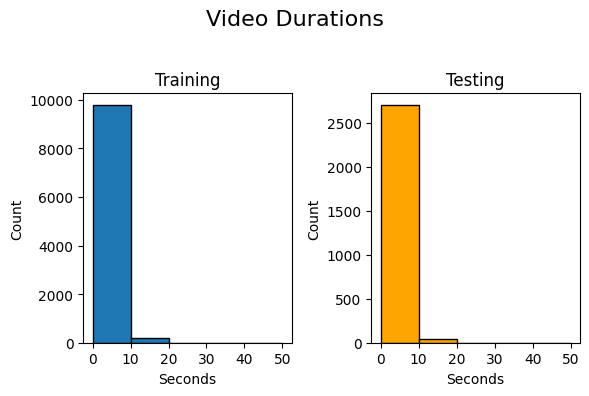

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    if fps == 0:  # Avoid division by zero
        return None
    return frame_count / fps

# Initialize lists and counters
train_durations = []
val_durations = []
test_durations = []
train_failed_count = 0
val_failed_count = 0
test_failed_count = 0
train_total_files = 0
val_total_files = 0
test_total_files = 0

# Process training videos
train_folder = '/kaggle/input/MELD-RAW/MELD.Raw/train/train_splits'
for filename in os.listdir(train_folder):
    if filename.endswith('.mp4'):
        train_total_files += 1
        path = os.path.join(train_folder, filename)
        duration = get_video_duration(path)
        if duration is not None:
            train_durations.append(duration)
        else:
            print(f"Warning (train): Failed to open {filename}")
            train_failed_count += 1

# Process Validation videos
val_folder = '/kaggle/input/MELD-RAW/MELD.Raw/dev/dev_splits_complete'
for filename in os.listdir(val_folder):
    if filename.endswith('.mp4'):
        val_total_files += 1
        path = os.path.join(val_folder, filename)
        duration = get_video_duration(path)
        if duration is not None:
            val_durations.append(duration)
        else:
            print(f"Warning (train): Failed to open {filename}")
            val_failed_count += 1

# Process testing videos
test_folder = '/kaggle/input/MELD-RAW/MELD.Raw/test/output_repeated_splits_test'
for filename in os.listdir(test_folder):
    if filename.endswith('.mp4'):
        test_total_files += 1
        path = os.path.join(test_folder, filename)
        duration = get_video_duration(path)
        if duration is not None:
            test_durations.append(duration)
        else:
            print(f"Warning (test): Failed to open {filename}")
            test_failed_count += 1

# Print detailed counts
print("\n--- Summary ---")
print(f"Training Folder:")
print(f"  Total files: {train_total_files}")
print(f"  Valid files: {len(train_durations)}")
print(f"  Invalid files: {train_failed_count}\n")

print(f"Validation Folder:")
print(f"  Total files: {val_total_files}")
print(f"  Valid files: {len(val_durations)}")
print(f"  Invalid files: {val_failed_count}\n")

print(f"Testing Folder:")
print(f"  Total files: {test_total_files}")
print(f"  Valid files: {len(test_durations)}")
print(f"  Invalid files: {test_failed_count}")

bin_width = 10  # 10 second bins
max_duration = 50  # You want it up to 50 seconds
bins = np.arange(0, max_duration + bin_width, bin_width)  # Bins: [0,10,20,30,40,50]

# Plotting using subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
fig.suptitle("Video Durations", fontsize=16)

# Training durations plot
if train_durations:
    axes[0].hist(train_durations, bins=bins, edgecolor='black')
    axes[0].set_title('Training')
    axes[0].set_xlabel('Seconds')
    axes[0].set_ylabel('Count')
    axes[0].set_xticks(bins)  # Ensure ticks at 0,10,20,30,40,50
else:
    axes[0].text(0.5, 0.5, 'No valid training videos', ha='center', va='center')
    axes[0].set_title('Training')

# Testing durations plot
if test_durations:
    axes[1].hist(test_durations, bins=bins, color='orange', edgecolor='black')
    axes[1].set_title('Testing')
    axes[1].set_xlabel('Seconds')
    axes[1].set_ylabel('Count')
    axes[1].set_xticks(bins)
else:
    axes[1].text(0.5, 0.5, 'No valid testing videos', ha='center', va='center')
    axes[1].set_title('Testing')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Extract labels
train_sentiment = train_df["Sentiment"]
test_sentiment = test_df["Sentiment"]

train_emotion = train_df["Emotion"]
test_emotion = test_df["Emotion"]

# Implement Stratified Baseline
sentiment_baseline = DummyClassifier(strategy="stratified", random_state=42)
sentiment_baseline.fit(train_sentiment.values.reshape(-1, 1), train_sentiment)

emotion_baseline = DummyClassifier(strategy="stratified", random_state=42)
emotion_baseline.fit(train_emotion.values.reshape(-1, 1), train_emotion)

# Predict on test data
sentiment_preds = sentiment_baseline.predict(test_sentiment.values.reshape(-1, 1))
emotion_preds = emotion_baseline.predict(test_emotion.values.reshape(-1, 1))

# Compute evaluation metrics
def evaluate(y_true, y_pred, label_type="Sentiment"):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    
    print(f"\n{label_type} Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Evaluate Sentiment Baseline
evaluate(test_sentiment, sentiment_preds, "Sentiment")

# Evaluate Emotion Baseline
evaluate(test_emotion, emotion_preds, "Emotion")


Sentiment Classification Metrics:
Accuracy: 0.3621
Precision: 0.3667
Recall: 0.3621
F1-Score: 0.3639

Emotion Classification Metrics:
Accuracy: 0.2946
Precision: 0.2900
Recall: 0.2946
F1-Score: 0.2919
